In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [3]:
file_link = "https://drive.google.com/file/d/1cEHJ7HK8LLNARzJmF3Y1mTU6cPMuRW-I/view?usp=drive_link"
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
df_20k = pd.read_csv(new_link)

In [4]:
file_link = "https://drive.google.com/file/d/15L8bYRdFb9Hf2oWz3GbMXVTU7Qx3Vjgi/view?usp=drive_link"
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
df_400 = pd.read_csv(new_link)

In [5]:
merged = pd.concat([df_20k, df_400])

In [6]:
merged['classification'].value_counts()

classification
0    16582
1     4356
Name: count, dtype: int64

In [7]:
merged.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
0,54.0,167.0,1.023,1.0,4.0,0.0,1.0,0.0,0.0,96.0,...,35.0,5791.0,5.6,1.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,127.0,1.023,3.0,2.0,0.0,0.0,0.0,1.0,73.0,...,25.0,5390.0,4.6,0.0,1.0,0.0,0.0,1.0,1.0,1
2,38.0,148.0,1.016,0.0,0.0,1.0,0.0,0.0,0.0,77.0,...,46.0,12098.0,4.7,0.0,0.0,1.0,0.0,1.0,0.0,0
3,7.0,98.0,1.017,4.0,0.0,1.0,0.0,0.0,1.0,225.0,...,24.0,6747.0,4.8,0.0,0.0,1.0,0.0,0.0,1.0,0
4,67.0,174.0,1.015,1.0,1.0,0.0,1.0,0.0,0.0,376.0,...,46.0,5759.0,5.7,0.0,0.0,0.0,0.0,1.0,1.0,0


In [8]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20938 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      20929 non-null  float64
 1   blood pressure           20926 non-null  float64
 2   specific gravity         20891 non-null  float64
 3   albumin                  20892 non-null  float64
 4   sugar                    20889 non-null  float64
 5   red blood cells          20786 non-null  float64
 6   pus cell                 20873 non-null  float64
 7   pus cell clumps          20934 non-null  float64
 8   bacteria                 20934 non-null  float64
 9   blood glucose random     20894 non-null  float64
 10  blood urea               20919 non-null  float64
 11  serum creatinine         20921 non-null  float64
 12  sodium                   20851 non-null  float64
 13  potassium                20850 non-null  float64
 14  hemoglobin               2088

In [9]:
binary_cols = []
for col in merged.columns:
    unique_values = merged[col].dropna().unique()
    if np.array_equal(np.sort(unique_values), np.array([0.0, 1.0])):
        binary_cols.append(col)

for col in binary_cols:
    print(f"Value counts for column '{col}':")
    display(merged[col].value_counts())
    print("-" * 20)

Value counts for column 'red blood cells':


red blood cells
0.0    10473
1.0    10313
Name: count, dtype: int64

--------------------
Value counts for column 'pus cell':


pus cell
0.0    10523
1.0    10350
Name: count, dtype: int64

--------------------
Value counts for column 'pus cell clumps':


pus cell clumps
0.0    10594
1.0    10340
Name: count, dtype: int64

--------------------
Value counts for column 'bacteria':


bacteria
0.0    10727
1.0    10207
Name: count, dtype: int64

--------------------
Value counts for column 'hypertension':


hypertension
0.0    10478
1.0    10458
Name: count, dtype: int64

--------------------
Value counts for column 'diabetes mellitus':


diabetes mellitus
0.0    10561
1.0    10375
Name: count, dtype: int64

--------------------
Value counts for column 'coronary artery disease':


coronary artery disease
0.0    10599
1.0    10337
Name: count, dtype: int64

--------------------
Value counts for column 'appetite':


appetite
0.0    10701
1.0    10236
Name: count, dtype: int64

--------------------
Value counts for column 'pedal edema':


pedal edema
0.0    10574
1.0    10363
Name: count, dtype: int64

--------------------
Value counts for column 'anemia':


anemia
0.0    10475
1.0    10462
Name: count, dtype: int64

--------------------
Value counts for column 'classification':


classification
0    16582
1     4356
Name: count, dtype: int64

--------------------


In [10]:
for col in binary_cols:
    mode_value = merged[col].mode()[0]
    merged[col] = merged[col].fillna(mode_value)

print("Null values after imputation:")
display(merged[binary_cols].isnull().sum())

Null values after imputation:


red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classification             0
dtype: int64

In [11]:
numerical_cols = merged.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in binary_cols]

for col in numerical_cols:
    mean_value = merged[col].mean()
    merged[col] = merged[col].fillna(mean_value)

print("Null values after imputing numerical columns:")
display(merged[numerical_cols].isnull().sum())

Null values after imputing numerical columns:


age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [12]:
merged.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
0,54.0,167.0,1.023,1.0,4.0,0.0,1.0,0.0,0.0,96.0,...,35.0,5791.0,5.6,1.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,127.0,1.023,3.0,2.0,0.0,0.0,0.0,1.0,73.0,...,25.0,5390.0,4.6,0.0,1.0,0.0,0.0,1.0,1.0,1
2,38.0,148.0,1.016,0.0,0.0,1.0,0.0,0.0,0.0,77.0,...,46.0,12098.0,4.7,0.0,0.0,1.0,0.0,1.0,0.0,0
3,7.0,98.0,1.017,4.0,0.0,1.0,0.0,0.0,1.0,225.0,...,24.0,6747.0,4.8,0.0,0.0,1.0,0.0,0.0,1.0,0
4,67.0,174.0,1.015,1.0,1.0,0.0,1.0,0.0,0.0,376.0,...,46.0,5759.0,5.7,0.0,0.0,0.0,0.0,1.0,1.0,0


In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20938 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      20938 non-null  float64
 1   blood pressure           20938 non-null  float64
 2   specific gravity         20938 non-null  float64
 3   albumin                  20938 non-null  float64
 4   sugar                    20938 non-null  float64
 5   red blood cells          20938 non-null  float64
 6   pus cell                 20938 non-null  float64
 7   pus cell clumps          20938 non-null  float64
 8   bacteria                 20938 non-null  float64
 9   blood glucose random     20938 non-null  float64
 10  blood urea               20938 non-null  float64
 11  serum creatinine         20938 non-null  float64
 12  sodium                   20938 non-null  float64
 13  potassium                20938 non-null  float64
 14  hemoglobin               2093

In [14]:
for col in binary_cols:
    merged[col] = merged[col].astype('int64')

print("Binary columns converted to int64:")
print(merged[binary_cols].dtypes)

Binary columns converted to int64:
red blood cells            int64
pus cell                   int64
pus cell clumps            int64
bacteria                   int64
hypertension               int64
diabetes mellitus          int64
coronary artery disease    int64
appetite                   int64
pedal edema                int64
anemia                     int64
classification             int64
dtype: object


In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20938 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      20938 non-null  float64
 1   blood pressure           20938 non-null  float64
 2   specific gravity         20938 non-null  float64
 3   albumin                  20938 non-null  float64
 4   sugar                    20938 non-null  float64
 5   red blood cells          20938 non-null  int64  
 6   pus cell                 20938 non-null  int64  
 7   pus cell clumps          20938 non-null  int64  
 8   bacteria                 20938 non-null  int64  
 9   blood glucose random     20938 non-null  float64
 10  blood urea               20938 non-null  float64
 11  serum creatinine         20938 non-null  float64
 12  sodium                   20938 non-null  float64
 13  potassium                20938 non-null  float64
 14  hemoglobin               2093

In [16]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# # Separate features (X) and target (y)
# X = merged.drop('classification', axis=1)
# y = merged['classification']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Initialize StandardScaler
# scaler = StandardScaler()

# # Fit and transform the scaler on the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the test data using the same scaler (do not fit again on the test data)
# X_test_scaled = scaler.transform(X_test)

# # Print the shape of the scaled data
# print("Shape of X_train_scaled:", X_train_scaled.shape)
# print("Shape of X_test_scaled:", X_test_scaled.shape)


In [17]:
# # Convert the scaled numpy array back to a pandas DataFrame to use .head()
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# display(X_train_scaled_df.head())

In [18]:
# merged.to_csv('20.4k updated_dataset.csv', index=False)
# print("Updated dataset exported successfully as 'updated_dataset.csv'")

# Work Start

In [19]:
# Separate features and target
X = merged.drop('classification', axis=1)
y = merged['classification']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = MinMaxScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res_scaled, y_train_res)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7480897803247374
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3317
           1       0.28      0.14      0.18       871

    accuracy                           0.75      4188
   macro avg       0.54      0.52      0.52      4188
weighted avg       0.69      0.75      0.71      4188



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
file_link = "https://drive.google.com/file/d/1InWoda-GWlyozroaVWzsj8rKuFg2bmeZ/view?usp=drive_link"
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
df_20k = pd.read_csv(new_link)
df = df_20k.copy()

In [17]:
# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

NameError: name 'df' is not defined

Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
ROC AUC: 0.8723305110943813
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      3345
           1       0.97      0.72      0.82      3288

    accuracy                           0.85      6633
   macro avg       0.87      0.85      0.84      6633
weighted avg       0.87      0.85      0.84      6633



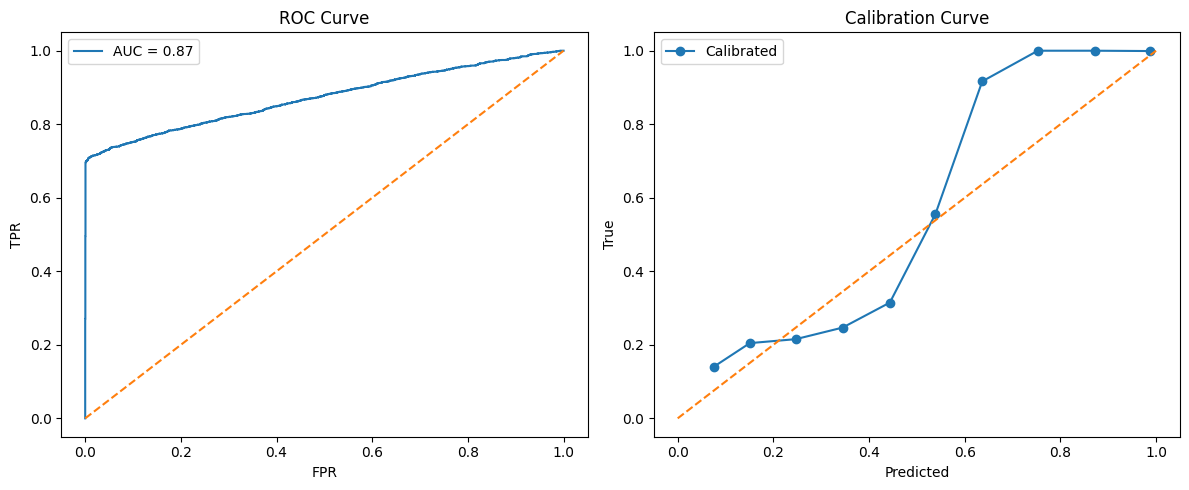

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Feature Selection with RandomForest
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_smote, y_smote)
selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
X_selected = selector.transform(X_smote)
selected_features = X.columns[selector.get_support()].tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_smote, test_size=0.2, random_state=42)

# Base models
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)


# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("Selected Features:", selected_features)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

# Calibration
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()

plt.tight_layout()
plt.show()


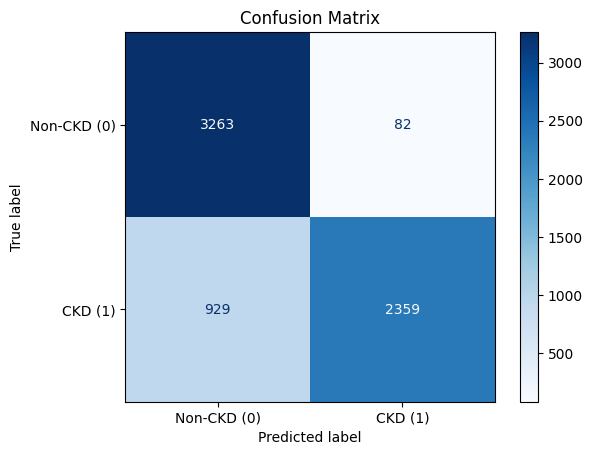

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = ensemble.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-CKD (0)", "CKD (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Forward Feature selection

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Base models
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)

# Function for Forward Feature Selection
def forward_feature_selection(X_train, X_test, y_train, y_test, base_models, scoring_metric=roc_auc_score):
    selected_features = []
    remaining_features = list(X_train.columns)
    best_score = 0
    
    while remaining_features:
        scores = []
        for feature in remaining_features:
            temp_features = selected_features + [feature]
            X_train_temp = X_train[temp_features]
            X_test_temp = X_test[temp_features]
            
            # Train the stacking model
            ensemble = StackingClassifier(
                estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
                final_estimator=LogisticRegression(),
                cv=5
            )
            ensemble.fit(X_train_temp, y_train)
            y_probs = ensemble.predict_proba(X_test_temp)[:, 1]
            
            # Calculate the performance score (e.g., ROC AUC)
            score = scoring_metric(y_test, y_probs)
            scores.append((score, feature))
        
        # Select the best feature (the one that improves the performance the most)
        scores.sort(reverse=True, key=lambda x: x[0])
        best_score, best_feature = scores[0]
        
        # Add the best feature to the selected set
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        
        print(f"Selected Features: {selected_features}")
        print(f"Current Best ROC AUC: {best_score:.4f}")
    
    return selected_features, best_score

# Perform Forward Feature Selection
selected_features, best_score = forward_feature_selection(pd.DataFrame(X_train), pd.DataFrame(X_test), y_train, y_test, [logreg, mlp, gb])

# Train final model using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Stacking Ensemble with selected features
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)
ensemble.fit(X_train_selected, y_train)
y_pred = ensemble.predict(X_test_selected)
y_probs = ensemble.predict_proba(X_test_selected)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train_selected, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test_selected)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("Selected Features:", selected_features)
print("Best ROC AUC (from Forward Selection):", best_score)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()


Selected Features: [17]
Current Best ROC AUC: 0.8548
Selected Features: [17, 11]
Current Best ROC AUC: 0.8595
Selected Features: [17, 11, 2]
Current Best ROC AUC: 0.8600
Selected Features: [17, 11, 2, 22]
Current Best ROC AUC: 0.8649
Selected Features: [17, 11, 2, 22, 20]
Current Best ROC AUC: 0.8657


# Backward feature selection

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = merged
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Base models
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)

# Function for Backward Feature Selection
def backward_feature_selection(X_train, X_test, y_train, y_test, base_models, scoring_metric=roc_auc_score):
    # Start with all features
    selected_features = list(X_train.columns)
    best_score = 0

    while len(selected_features) > 0:
        scores = []
        
        # Try removing each feature one by one and evaluate the performance
        for feature in selected_features:
            temp_features = [f for f in selected_features if f != feature]
            X_train_temp = X_train[temp_features]
            X_test_temp = X_test[temp_features]
            
            # Train the stacking model
            ensemble = StackingClassifier(
                estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
                final_estimator=LogisticRegression(),
                cv=5
            )
            ensemble.fit(X_train_temp, y_train)
            y_probs = ensemble.predict_proba(X_test_temp)[:, 1]
            
            # Calculate the performance score (e.g., ROC AUC)
            score = scoring_metric(y_test, y_probs)
            scores.append((score, feature))
        
        # Find the feature whose removal has the least negative impact (or best performance)
        scores.sort(reverse=True, key=lambda x: x[0])
        best_score, feature_to_remove = scores[0]
        
        # If removal doesn't degrade performance, remove that feature
        selected_features.remove(feature_to_remove)
        
        print(f"Remaining Features: {selected_features}")
        print(f"Current Best ROC AUC: {best_score:.4f}")
        
        # Stop if performance starts to degrade significantly
        if len(scores) == 0 or best_score <= 0.5:  # You can adjust the threshold for stopping.
            break
    
    return selected_features, best_score

# Perform Backward Feature Selection
selected_features, best_score = backward_feature_selection(pd.DataFrame(X_train), pd.DataFrame(X_test), y_train, y_test, [logreg, mlp, gb])

# Train final model using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Stacking Ensemble with selected features
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)
ensemble.fit(X_train_selected, y_train)
y_pred = ensemble.predict(X_test_selected)
y_probs = ensemble.predict_proba(X_test_selected)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train_selected, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test_selected)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("Selected Features:", selected_features)
print("Best ROC AUC (from Backward Selection):", best_score)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()


# PCA + RFE

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_smote)

# Perform RFE with Logistic Regression (or any classifier)
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Selecting top 10 features
X_rfe = rfe.fit_transform(X_pca, y_smote)
selected_features = np.array([f"PC{i+1}" for i in range(X_rfe.shape[1])])  # Naming the selected features

# Train-test split with selected features from RFE
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_smote, test_size=0.2, random_state=42)

# Base models for stacking
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)

# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the ensemble model
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("Selected Features (after PCA + RFE):", selected_features)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()


# Ranking Algorithm and Information Gain (IG)

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Feature Selection with RandomForest (Ranking Algorithm)
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_smote, y_smote)
feature_importance = rf_selector.feature_importances_

# Rank features based on importance
ranked_features = np.argsort(feature_importance)[::-1]  # Features ranked by importance (highest to lowest)
ranked_feature_names = X.columns[ranked_features]

print("Ranked Features (Based on Random Forest Importance):")
print(ranked_feature_names)

# Information Gain-based Feature Selection
# Use Mutual Information to compute the Information Gain for each feature
mutual_info = mutual_info_classif(X_smote, y_smote)
info_gain_sorted_indices = np.argsort(mutual_info)[::-1]  # Sorting features by Information Gain
info_gain_feature_names = X.columns[info_gain_sorted_indices]

print("\nFeatures Ranked by Information Gain (Mutual Information):")
print(info_gain_feature_names)

# You can select top N features based on either Ranking or Information Gain (Here selecting top 10 for example)
top_n_features = 10
selected_features = info_gain_feature_names[:top_n_features]  # For example, selecting top 10 features based on Information Gain
print("\nSelected Features (Top 10 based on Information Gain):")
print(selected_features)

# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(X_smote[selected_features], y_smote, test_size=0.2, random_state=42)

# Base models for stacking
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)

# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the ensemble model
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("\nROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()


# Taking ALL features !! 

ROC AUC: 0.8927227332074964
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      3345
           1       0.98      0.75      0.85      3288

    accuracy                           0.87      6633
   macro avg       0.89      0.86      0.86      6633
weighted avg       0.89      0.87      0.86      6633



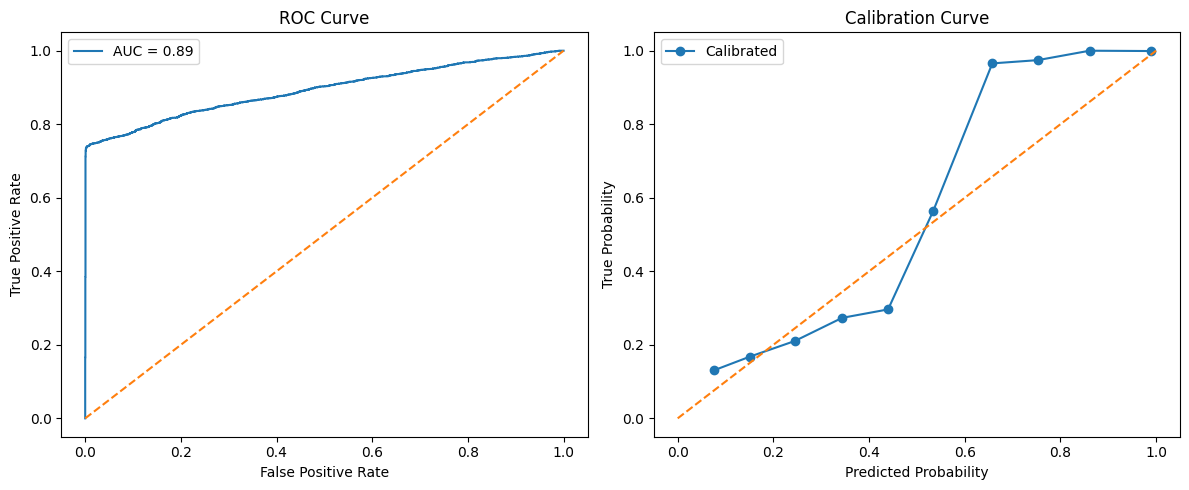

In [43]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Base models for stacking
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)

# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the ensemble model
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting the results
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()


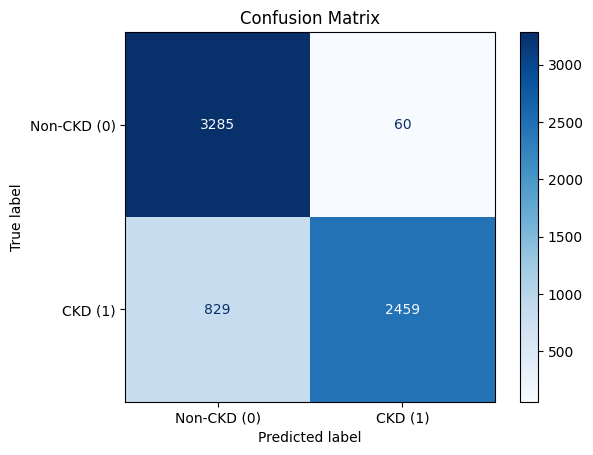

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = ensemble.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-CKD (0)", "CKD (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Other Comparisons !!!

Grok !!!

In [ ]:
# If running in a Jupyter notebook, install xgboost using pip magic
!pip install xgboost


Stacking Results:
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
ROC AUC: 0.8723305110943813
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      3345
           1       0.97      0.72      0.82      3288

    accuracy                           0.85      6633
   macro avg       0.87      0.85      0.84      6633
weighted avg       0.87      0.85      0.84      6633


Voting Results:
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
ROC AUC: 0.8671110965634876
Classification Report:
               precision    recall  f1-score   support

           0       0.77     

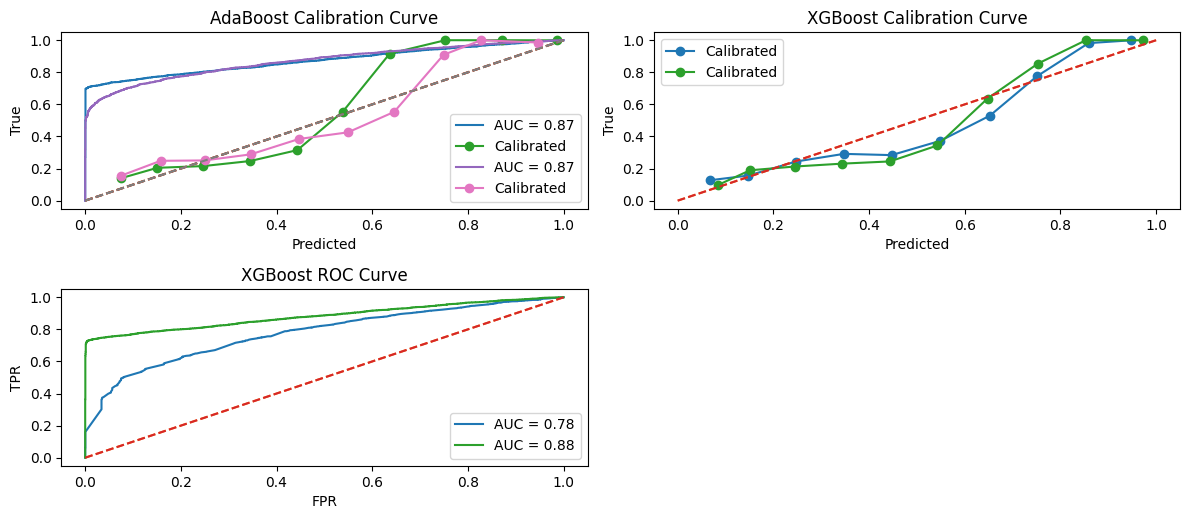

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Load dataset (uncomment and adjust path as needed)
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Assuming df is already loaded
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Feature Selection with RandomForest
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_smote, y_smote)
selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
X_selected = selector.transform(X_smote)
selected_features = X.columns[selector.get_support()].tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_smote, test_size=0.2, random_state=42)

# Initialize base models
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
adaboost = AdaBoostClassifier(random_state=42)

# Define ensemble models
stacking = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)
voting = VotingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    voting='soft'
)

# List of models to compare
models = {
    'Stacking': stacking,
    'Voting': voting,
    'AdaBoost': adaboost,
    'XGBoost': xgb_model
}

# Store results for plotting
results = {}
plt.figure(figsize=(12, 10))

# Subplot indices for ROC and Calibration curves
plot_positions = {
    'Stacking': (1, 1, 2, 1),
    'Voting': (1, 2, 2, 2),
    'AdaBoost': (3, 1, 4, 1),
    'XGBoost': (3, 2, 4, 2)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calibration
    calibrated_model = CalibratedClassifierCV(estimator=model, method='sigmoid', cv=5)
    calibrated_model.fit(X_train, y_train)
    calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

    # Metrics
    roc_auc = roc_auc_score(y_test, y_probs)
    report = classification_report(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print("Selected Features:", selected_features)
    print("ROC AUC:", roc_auc)
    print("Classification Report:\n", report)

    # Store results
    results[model_name] = {
        'fpr': roc_curve(y_test, y_probs)[0],
        'tpr': roc_curve(y_test, y_probs)[1],
        'roc_auc': roc_auc,
        'prob_true': prob_true,
        'prob_pred': prob_pred
    }

    # Plot ROC Curve
    plt.subplot(4, 2, plot_positions[model_name][0])
    plt.plot(results[model_name]['fpr'], results[model_name]['tpr'], label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f"{model_name} ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()

    # Plot Calibration Curve
    plt.subplot(4, 2, plot_positions[model_name][1])
    plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f"{model_name} Calibration Curve")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.legend()

plt.tight_layout()
plt.show()

DeepSeek !!!

Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Training set shape: (26531, 12)
Test set shape: (6633, 12)

Training Original Stacking...
Original Stacking - Accuracy: 0.848, ROC AUC: 0.872

Training Voting (Hard)...
Voting (Hard) doesn't support probability predictions
Voting (Hard) - Accuracy: 0.812, ROC AUC: N/A

Training Voting (Soft)...
Voting (Soft) - Accuracy: 0.853, ROC AUC: 0.900

Training Enhanced Stacking...
Cross-validation failed for Enhanced Stacking
Enhanced Stacking - Accuracy: 0.877, ROC AUC: 0.916

Training Bagging (DT)...
Cross-validation failed for Bagging (DT)
Bagging (DT) - Accuracy: 0.855, ROC AUC: 0.900

Training AdaBoost...
AdaBoost - Accuracy: 0.793, ROC AUC: 0.848

Training Random Forest...
Random Forest - Accuracy: 0.872, ROC AUC: 0.919

Training Hist Gradient Boosting...
Hist Gradien

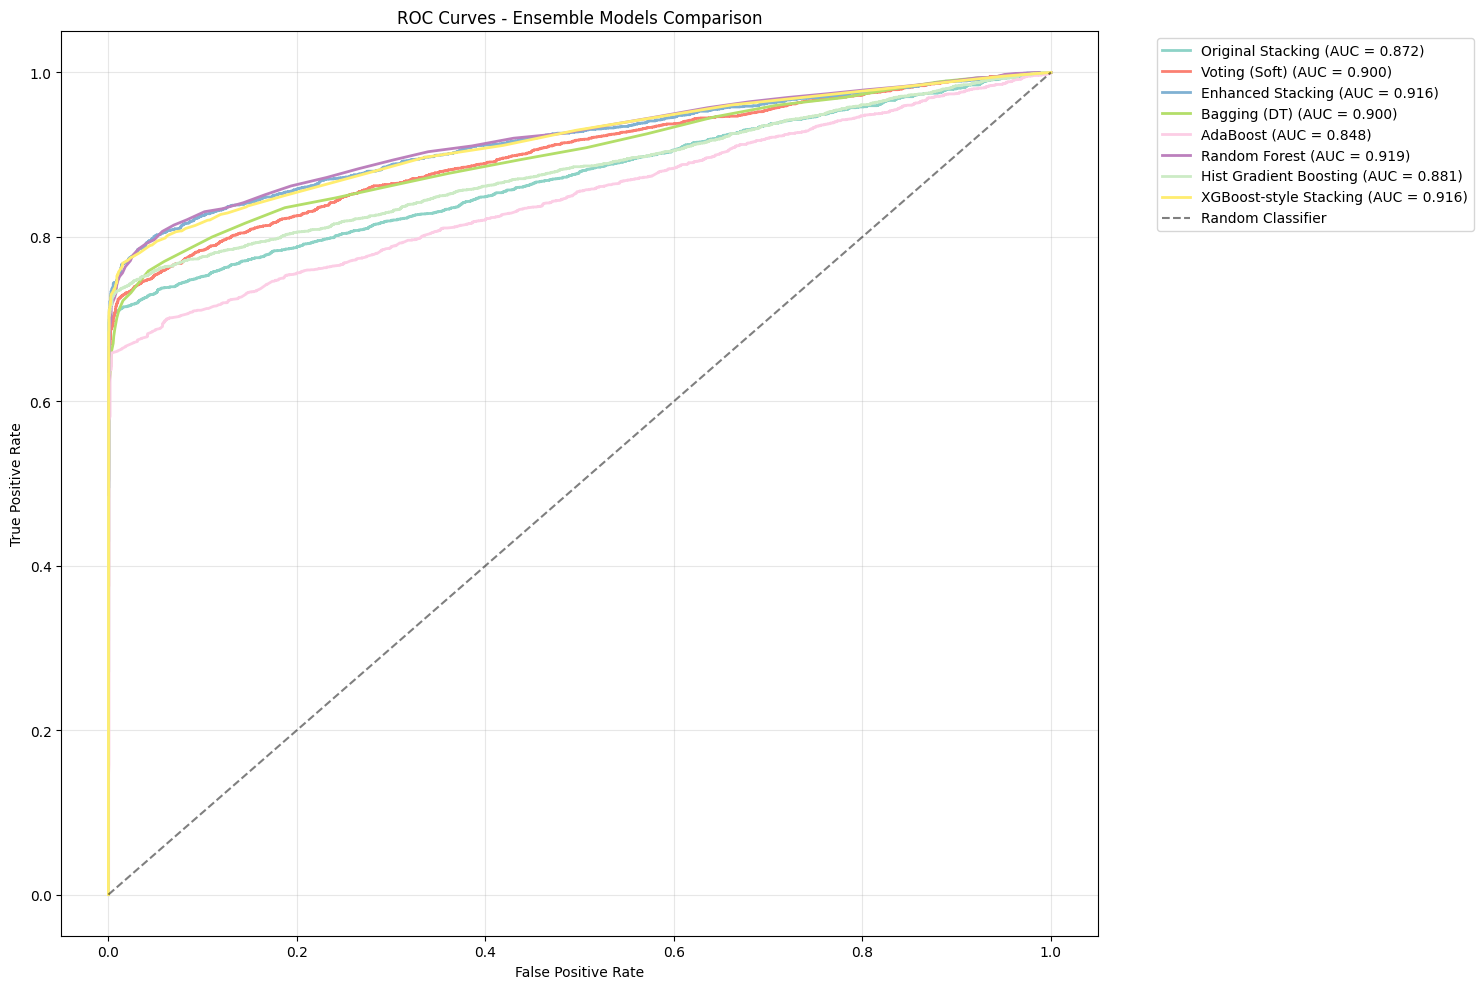


ENSEMBLE MODELS COMPARISON RESULTS

Performance Metrics:
                    Model  ROC AUC  Accuracy   F1_0   F1_1  CV_Mean  CV_Std
6           Random Forest    0.919     0.872  0.886  0.854    0.863   0.168
3       Enhanced Stacking    0.916     0.877  0.888  0.864      NaN     NaN
8  XGBoost-style Stacking    0.916     0.877  0.889  0.861    0.867   0.162
2           Voting (Soft)    0.900     0.853  0.867  0.835    0.849   0.169
4            Bagging (DT)    0.900     0.855  0.872  0.834      NaN     NaN
7  Hist Gradient Boosting    0.881     0.861  0.879  0.838    0.855   0.184
0       Original Stacking    0.872     0.848  0.866  0.824    0.843   0.179
5                AdaBoost    0.848     0.793  0.806  0.778    0.804   0.158
1           Voting (Hard)      NaN     0.812  0.842  0.768    0.809   0.151


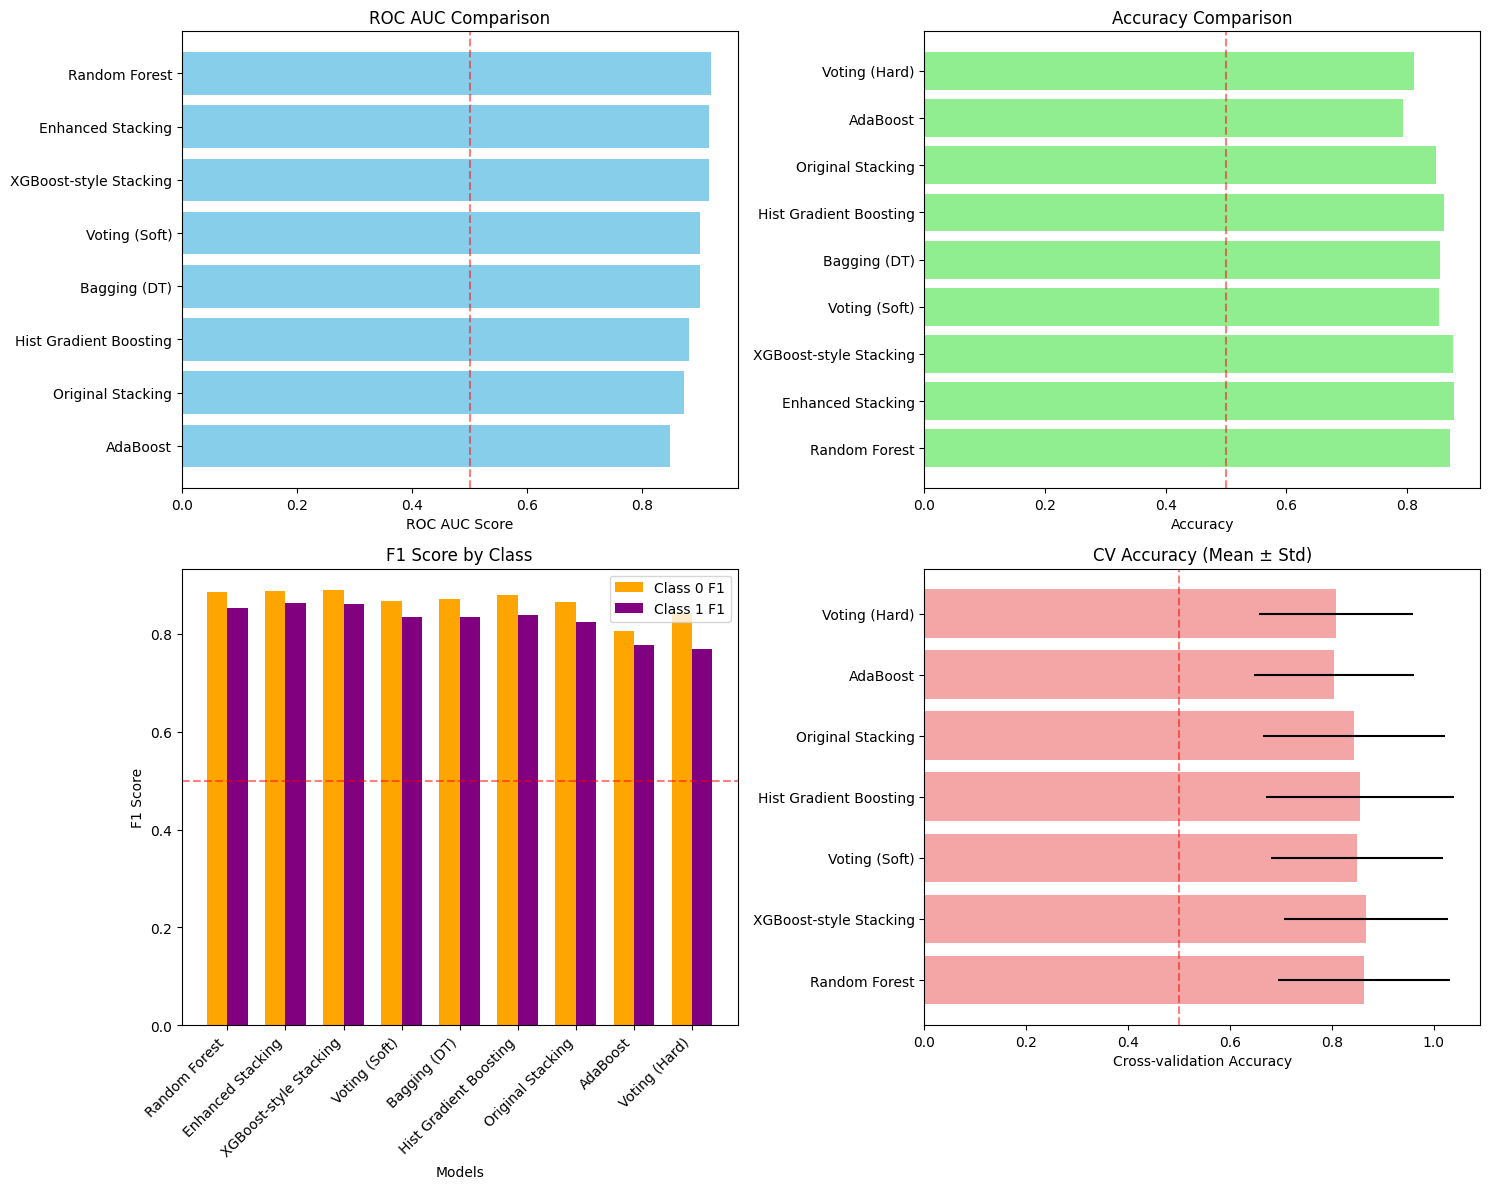


Detailed Performance Metrics:
                    Model  ROC AUC  Accuracy  Precision_0  Recall_0   F1_0  \
6           Random Forest    0.919     0.872        0.804     0.985  0.886   
3       Enhanced Stacking    0.916     0.877        0.821     0.967  0.888   
8  XGBoost-style Stacking    0.916     0.877        0.813     0.980  0.889   
2           Voting (Soft)    0.900     0.853        0.795     0.955  0.867   
4            Bagging (DT)    0.900     0.855        0.788     0.976  0.872   
7  Hist Gradient Boosting    0.881     0.861        0.786     0.996  0.879   
0       Original Stacking    0.872     0.848        0.778     0.975  0.866   
5                AdaBoost    0.848     0.793        0.764     0.853  0.806   
1           Voting (Hard)      NaN     0.812        0.731     0.991  0.842   

   Precision_1  Recall_1   F1_1  CV_Mean  CV_Std  
6        0.980     0.756  0.854    0.863   0.168  
3        0.958     0.786  0.864      NaN     NaN  
8        0.975     0.771  0.861    

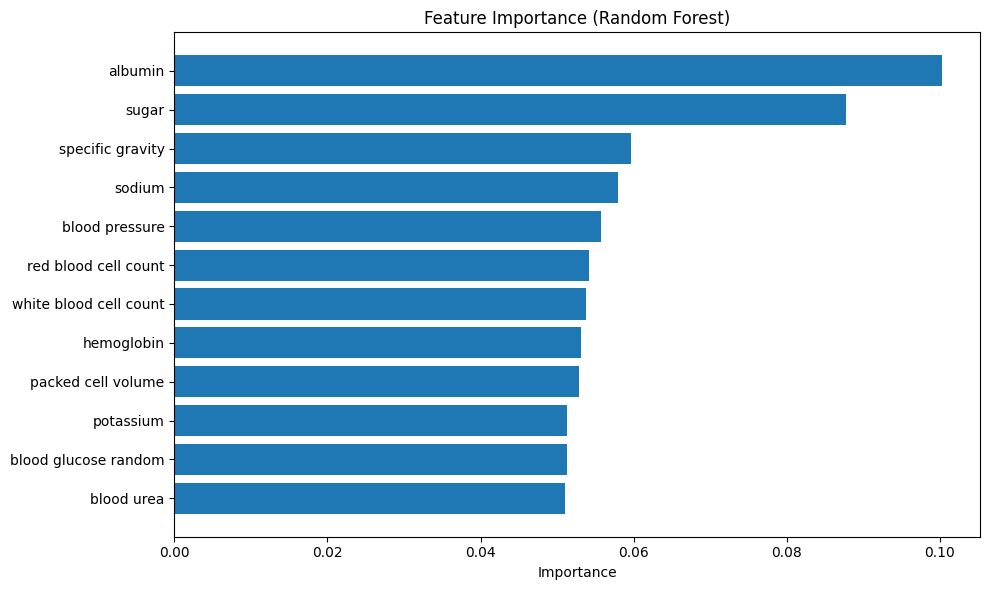


MODEL TYPE ANALYSIS

Performance by Model Type:
               ROC AUC  Accuracy   F1_0   F1_1
Model_Type                                    
Bagging          0.900     0.855  0.872  0.834
Boosting         0.865     0.827  0.842  0.808
Random Forest    0.919     0.872  0.886  0.854
Stacking         0.902     0.867  0.881  0.849
Voting           0.900     0.832  0.855  0.801


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                             StackingClassifier, VotingClassifier, BaggingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load dataset (uncomment when you have the data)
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing (using your existing code)
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Feature Selection with RandomForest
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_smote, y_smote)
selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
X_selected = selector.transform(X_smote)
selected_features = X.columns[selector.get_support()].tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_smote, test_size=0.2, random_state=42)

print("Selected Features:", selected_features)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Define base models (same as your original)
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# 1. Your Original Stacking Ensemble
original_stacking = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# 2. Voting Classifier (Hard Voting)
voting_hard = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='hard'
)

# 3. Voting Classifier (Soft Voting)
voting_soft = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='soft'
)

# 4. Enhanced Stacking with More Models
enhanced_stacking = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('mlp', MLPClassifier(random_state=42, max_iter=500))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# 5. Bagging Classifier with Decision Tree
bagging_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)

# 6. AdaBoost Classifier
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    random_state=42
)

# 7. Random Forest (as a baseline ensemble)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# 8. Histogram-Based Gradient Boosting
hist_gb = HistGradientBoostingClassifier(random_state=42)

# 9. XGBoost-style Stacking (using GradientBoosting as meta)
xgboost_style_stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42))
    ],
    final_estimator=GradientBoostingClassifier(n_estimators=25, random_state=42),
    cv=5
)

# List of all models to compare
models = {
    'Original Stacking': original_stacking,
    'Voting (Hard)': voting_hard,
    'Voting (Soft)': voting_soft,
    'Enhanced Stacking': enhanced_stacking,
    'Bagging (DT)': bagging_dt,
    'AdaBoost': adaboost,
    'Random Forest': random_forest,
    'Hist Gradient Boosting': hist_gb,
    'XGBoost-style Stacking': xgboost_style_stacking
}

# Evaluate each model
results = []

plt.figure(figsize=(15, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

for i, (name, model) in enumerate(models.items()):
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Probabilities (for models that support predict_proba)
    roc_auc = None
    try:
        y_probs = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_probs)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
    except AttributeError:
        # For models that don't support predict_proba (like hard voting)
        print(f"{name} doesn't support probability predictions")
        # Use decision function or other method if available
        try:
            y_scores = model.decision_function(X_test)
            roc_auc = roc_auc_score(y_test, y_scores)
            fpr, tpr, _ = roc_curve(y_test, y_scores)
            plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
        except:
            # If no probability method is available, skip ROC curve
            pass
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    f1_0 = report['0']['f1-score']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_1 = report['1']['f1-score']
    
    # Cross-validation score
    try:
        cv_scores = cross_val_score(model, X_selected, y_smote, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    except:
        cv_mean = np.nan
        cv_std = np.nan
        print(f"Cross-validation failed for {name}")
    
    # Store results
    results.append({
        'Model': name,
        'ROC AUC': roc_auc if roc_auc is not None else np.nan,
        'Accuracy': accuracy,
        'Precision_0': precision_0,
        'Recall_0': recall_0,
        'F1_0': f1_0,
        'Precision_1': precision_1,
        'Recall_1': recall_1,
        'F1_1': f1_1,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std
    })
    
    # Fixed print statement
    auc_display = f"{roc_auc:.3f}" if roc_auc is not None else "N/A"
    print(f"{name} - Accuracy: {accuracy:.3f}, ROC AUC: {auc_display}")

# Add diagonal line for ROC plot
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Ensemble Models Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create results dataframe
results_df = pd.DataFrame(results)

# Sort by ROC AUC (descending), handling NaN values
if 'ROC AUC' in results_df.columns:
    results_df = results_df.sort_values('ROC AUC', ascending=False, na_position='last')

print("\n" + "="*80)
print("ENSEMBLE MODELS COMPARISON RESULTS")
print("="*80)

# Display results
print("\nPerformance Metrics:")
display_columns = ['Model', 'ROC AUC', 'Accuracy', 'F1_0', 'F1_1', 'CV_Mean', 'CV_Std']
print(results_df[display_columns].round(3))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ROC AUC Comparison (only for models with ROC AUC)
if 'ROC AUC' in results_df.columns:
    auc_data = results_df.dropna(subset=['ROC AUC']).sort_values('ROC AUC')
    if not auc_data.empty:
        axes[0, 0].barh(auc_data['Model'], auc_data['ROC AUC'], color='skyblue')
        axes[0, 0].set_xlabel('ROC AUC Score')
        axes[0, 0].set_title('ROC AUC Comparison')
        axes[0, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
    else:
        axes[0, 0].text(0.5, 0.5, 'No ROC AUC data available', 
                       ha='center', va='center', transform=axes[0, 0].transAxes)

# 2. Accuracy Comparison
axes[0, 1].barh(results_df['Model'], results_df['Accuracy'], color='lightgreen')
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_title('Accuracy Comparison')
axes[0, 1].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)

# 3. F1-Score Comparison
models_list = results_df['Model']
f1_0_scores = results_df['F1_0']
f1_1_scores = results_df['F1_1']

x = np.arange(len(models_list))
width = 0.35

axes[1, 0].bar(x - width/2, f1_0_scores, width, label='Class 0 F1', color='orange')
axes[1, 0].bar(x + width/2, f1_1_scores, width, label='Class 1 F1', color='purple')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].set_title('F1 Score by Class')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models_list, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)

# 4. Cross-validation Results (only for models with CV scores)
cv_data = results_df.dropna(subset=['CV_Mean'])
if not cv_data.empty:
    axes[1, 1].barh(cv_data['Model'], cv_data['CV_Mean'], xerr=cv_data['CV_Std'], 
                    color='lightcoral', alpha=0.7)
    axes[1, 1].set_xlabel('Cross-validation Accuracy')
    axes[1, 1].set_title('CV Accuracy (Mean ± Std)')
    axes[1, 1].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
else:
    axes[1, 1].text(0.5, 0.5, 'No CV data available', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

# Detailed comparison table
print("\nDetailed Performance Metrics:")
detailed_columns = ['Model', 'ROC AUC', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_0', 
                   'Precision_1', 'Recall_1', 'F1_1', 'CV_Mean', 'CV_Std']
print(results_df[detailed_columns].round(3))

# Find best model based on ROC AUC (if available)
if 'ROC AUC' in results_df.columns and not results_df['ROC AUC'].isna().all():
    valid_models = results_df.dropna(subset=['ROC AUC'])
    if not valid_models.empty:
        best_model_info = valid_models.iloc[0]
        print(f"\n🎯 BEST MODEL: {best_model_info['Model']}")
        print(f"   ROC AUC: {best_model_info['ROC AUC']:.3f}")
        print(f"   Accuracy: {best_model_info['Accuracy']:.3f}")
        if not pd.isna(best_model_info['CV_Mean']):
            print(f"   CV Accuracy: {best_model_info['CV_Mean']:.3f} ± {best_model_info['CV_Std']:.3f}")

# Alternative: Find best model based on Accuracy if no ROC AUC available
else:
    best_model_info = results_df.iloc[results_df['Accuracy'].idxmax()]
    print(f"\n🎯 BEST MODEL (by Accuracy): {best_model_info['Model']}")
    print(f"   Accuracy: {best_model_info['Accuracy']:.3f}")
    if not pd.isna(best_model_info['CV_Mean']):
        print(f"   CV Accuracy: {best_model_info['CV_Mean']:.3f} ± {best_model_info['CV_Std']:.3f}")

# Additional: Feature Importance from Random Forest (if available)
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

rf_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_selector.feature_importances_[selector.get_support()]
}).sort_values('importance', ascending=False)

print(rf_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance['feature'], rf_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model type analysis
print("\n" + "="*50)
print("MODEL TYPE ANALYSIS")
print("="*50)

# Group by model type
results_df['Model_Type'] = results_df['Model'].apply(lambda x: 
    'Stacking' if 'Stacking' in x else
    'Voting' if 'Voting' in x else
    'Boosting' if 'Boost' in x else
    'Bagging' if 'Bagging' in x else
    'Random Forest' if 'Random Forest' in x else
    'Other'
)

if 'ROC AUC' in results_df.columns:
    model_type_performance = results_df.groupby('Model_Type').agg({
        'ROC AUC': 'mean',
        'Accuracy': 'mean',
        'F1_0': 'mean', 
        'F1_1': 'mean'
    }).round(3)

print("\nPerformance by Model Type:")
print(model_type_performance)

TensorFlow Version: 2.20.0
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Processed data shape: (33164, 12)
Training set: (26531, 12), Test set: (6633, 12)

Training Shallow_NN_1Layer
Epoch 1/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.5109 - loss: 0.9103 - val_accuracy: 0.5233 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 2/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.5088 - loss: 0.6950 - val_accuracy: 0.5142 - val_loss: 0.6947 - learning_rate: 0.0010
Epoch 3/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.5100 - loss: 0.6946 - val_accuracy: 0.5224 - val_loss: 0.6946 - learning_rate: 0.0010
Epoch 4/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.5119 - loss: 0.6946 - val_accuracy: 0.5222 - val_loss: 0.6948 - learning_rate: 0.0010
Epoch 5/100
830/83

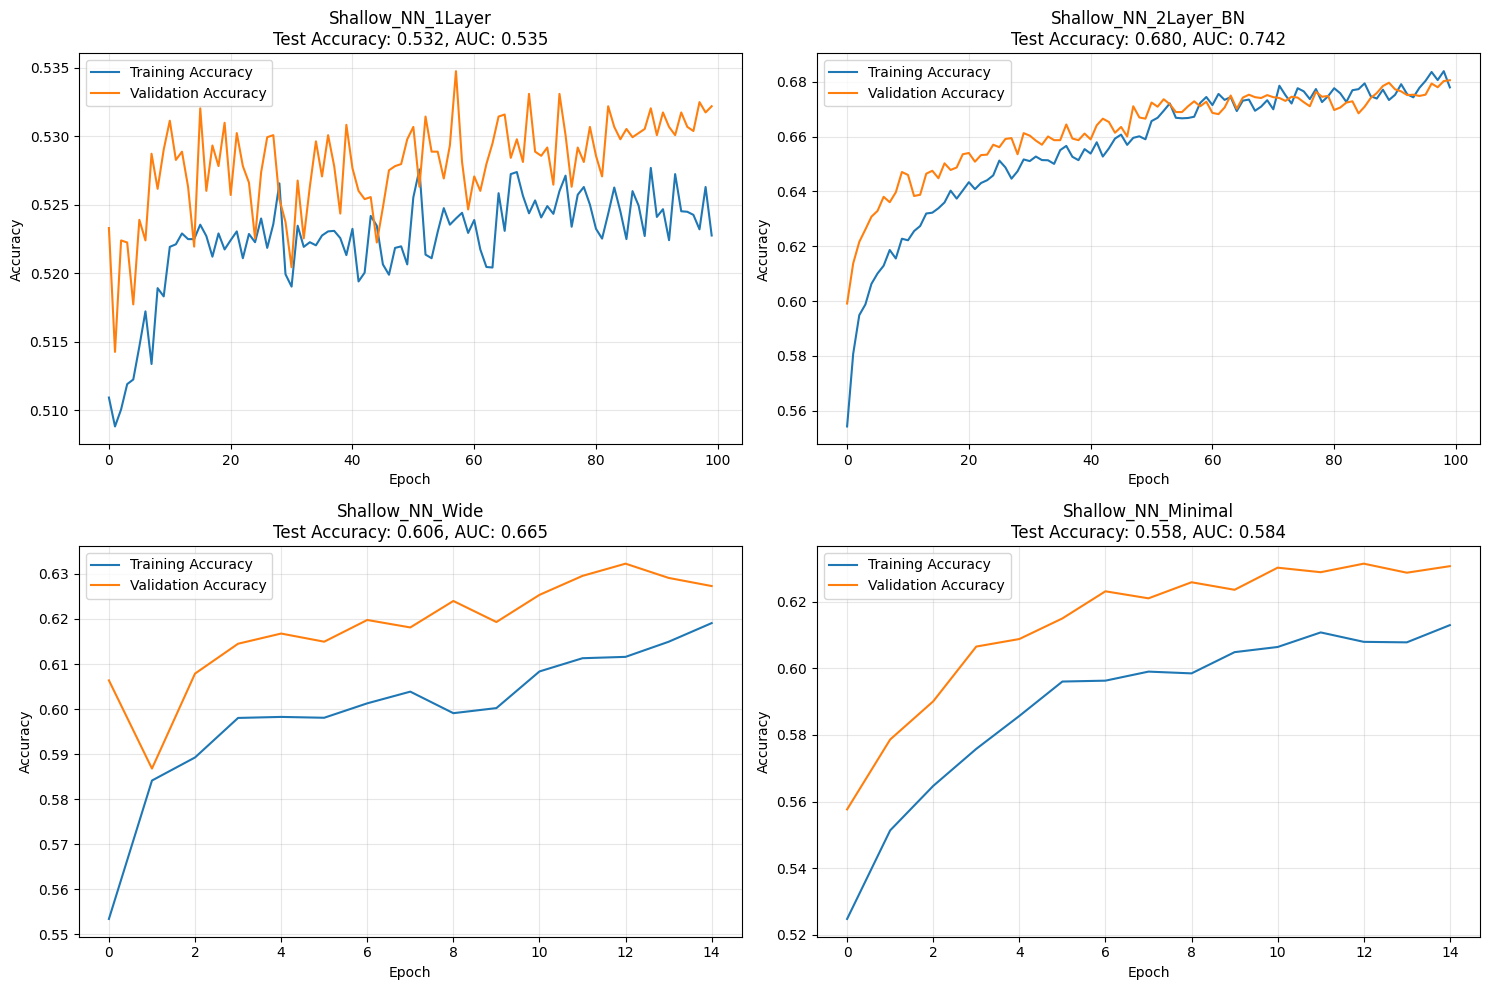


Shallow Neural Networks Results:
                  Model                                       Architecture  \
0     Shallow_NN_1Layer  [<Dense name=dense, built=True>, <Dropout name...   
1  Shallow_NN_2Layer_BN  [<Dense name=dense_2, built=True>, <BatchNorma...   
2       Shallow_NN_Wide  [<Dense name=dense_5, built=True>, <BatchNorma...   
3    Shallow_NN_Minimal  [<Dense name=dense_8, built=True>, <Dropout na...   

   Test_Accuracy  Test_Loss  ROC_AUC  Precision_0  Recall_0   F1_0  \
0          0.532      0.691    0.535        0.562     0.290  0.382   
1          0.680      0.605    0.742        0.677     0.688  0.683   
2          0.606      0.850    0.665        0.660     0.440  0.528   
3          0.558      0.685    0.584        0.574     0.448  0.503   

   Precision_1  Recall_1   F1_1  Training_Epochs  
0        0.521     0.774  0.623              100  
1        0.683     0.672  0.678              100  
2        0.580     0.773  0.663               15  
3        0.547     0

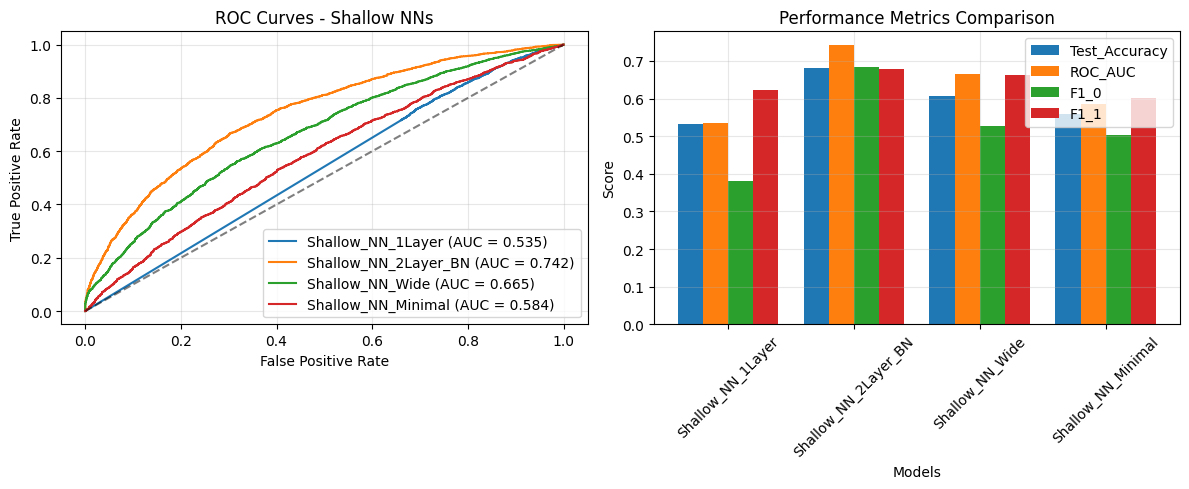

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


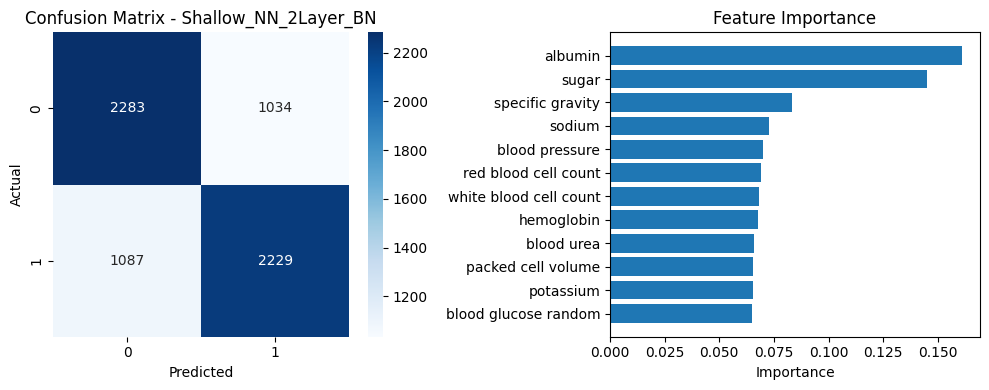


Feature Importance:
                   Feature  Importance
2                  albumin      0.1613
3                    sugar      0.1452
1         specific gravity      0.0831
6                   sodium      0.0729
0           blood pressure      0.0700
11    red blood cell count      0.0692
10  white blood cell count      0.0683
8               hemoglobin      0.0678
5               blood urea      0.0658
9       packed cell volume      0.0656
7                potassium      0.0656
4     blood glucose random      0.0651

Model Architectures Summary:

Shallow_NN_1Layer:
Layers: 2 dense layers
Parameters: 962

Shallow_NN_2Layer_BN:
Layers: 3 dense layers
Parameters: 10,562

Shallow_NN_Wide:
Layers: 3 dense layers
Parameters: 37,506

Shallow_NN_Minimal:
Layers: 3 dense layers
Parameters: 978


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import to_categorical

print("TensorFlow Version:", tf.__version__)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)
    
    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()
    
    return X_selected, y_smote, selected_features, scaler, selector

# Preprocess data
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)

print("Selected Features:", selected_features)
print("Processed data shape:", X_processed.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Define shallow neural network architectures
def create_shallow_nn_1(input_dim):
    """Simple 1-hidden layer NN"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    return model

def create_shallow_nn_2(input_dim):
    """2-hidden layer NN with batch normalization"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    return model

def create_shallow_nn_3(input_dim):
    """Wide shallow network"""
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,), kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(2, activation='softmax')
    ])
    return model

def create_shallow_nn_4(input_dim):
    """Minimalist shallow network"""
    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    return model

# Compile and train shallow models
shallow_models = {
    'Shallow_NN_1Layer': create_shallow_nn_1(X_train.shape[1]),
    'Shallow_NN_2Layer_BN': create_shallow_nn_2(X_train.shape[1]),
    'Shallow_NN_Wide': create_shallow_nn_3(X_train.shape[1]),
    'Shallow_NN_Minimal': create_shallow_nn_4(X_train.shape[1])
}

# Training configuration
epochs = 100
batch_size = 32

callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
]

# Train and evaluate shallow models
results_shallow = []

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(shallow_models.items()):
    print(f"\n{'='*50}")
    print(f"Training {name}")
    print(f"{'='*50}")
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train model
    history = model.fit(
        X_train, y_train_cat,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test_cat),
        callbacks=callbacks,
        verbose=1
    )
    
    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results_shallow.append({
        'Model': name,
        'Architecture': str(model.layers),
        'Test_Accuracy': test_accuracy,
        'Test_Loss': test_loss,
        'ROC_AUC': roc_auc,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
        'Training_Epochs': len(history.history['loss'])
    })
    
    # Plot training history
    plt.subplot(2, 2, i+1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name}\nTest Accuracy: {test_accuracy:.3f}, AUC: {roc_auc:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Results analysis
results_df_shallow = pd.DataFrame(results_shallow)
print("\nShallow Neural Networks Results:")
print("="*60)
print(results_df_shallow.round(3))

# Best shallow model
best_shallow = results_df_shallow.loc[results_df_shallow['ROC_AUC'].idxmax()]
print(f"\n🎯 BEST SHALLOW MODEL: {best_shallow['Model']}")
print(f"   ROC AUC: {best_shallow['ROC_AUC']:.3f}")
print(f"   Accuracy: {best_shallow['Test_Accuracy']:.3f}")

# ROC Curve comparison
plt.figure(figsize=(12, 5))

# ROC Curves
plt.subplot(1, 2, 1)
for i, (name, model) in enumerate(shallow_models.items()):
    y_pred_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Shallow NNs')
plt.legend()
plt.grid(True, alpha=0.3)

# Performance comparison
plt.subplot(1, 2, 2)
metrics = ['Test_Accuracy', 'ROC_AUC', 'F1_0', 'F1_1']
x = np.arange(len(results_df_shallow))
width = 0.2

for j, metric in enumerate(metrics):
    values = results_df_shallow[metric].values
    plt.bar(x + j*width, values, width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(x + width*1.5, results_df_shallow['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Confusion matrix for best model
best_model_name = best_shallow['Model']
best_model = shallow_models[best_model_name]
y_pred_best = np.argmax(best_model.predict(X_test), axis=1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': RandomForestClassifier(random_state=42).fit(X_processed, y_processed).feature_importances_
}).sort_values('Importance', ascending=False)

plt.subplot(1, 2, 2)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(feature_importance.round(4))

# Model architectures summary
print("\nModel Architectures Summary:")
for result in results_shallow:
    print(f"\n{result['Model']}:")
    print(f"Layers: {len(result['Architecture'].split('Dense')) - 1} dense layers")
    print(f"Parameters: {shallow_models[result['Model']].count_params():,}")

TensorFlow Version: 2.20.0
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Processed data shape: (33164, 12)
Training set: (26531, 12), Test set: (6633, 12)

Training Deep_NN_6Layer
Model Parameters: 184,866
Epoch 1/150
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5459 - loss: 1.2099 - val_accuracy: 0.5994 - val_loss: 1.0693 - learning_rate: 0.0010
Epoch 2/150
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5891 - loss: 0.9925 - val_accuracy: 0.6222 - val_loss: 0.8990 - learning_rate: 0.0010
Epoch 3/150
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6043 - loss: 0.8465 - val_accuracy: 0.6252 - val_loss: 0.7886 - learning_rate: 0.0010
Epoch 4/150
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6069 - loss: 0.7668 - val_accuracy: 0.6213 - val_loss: 0.7384 - learning_rate: 0.0010
Epo

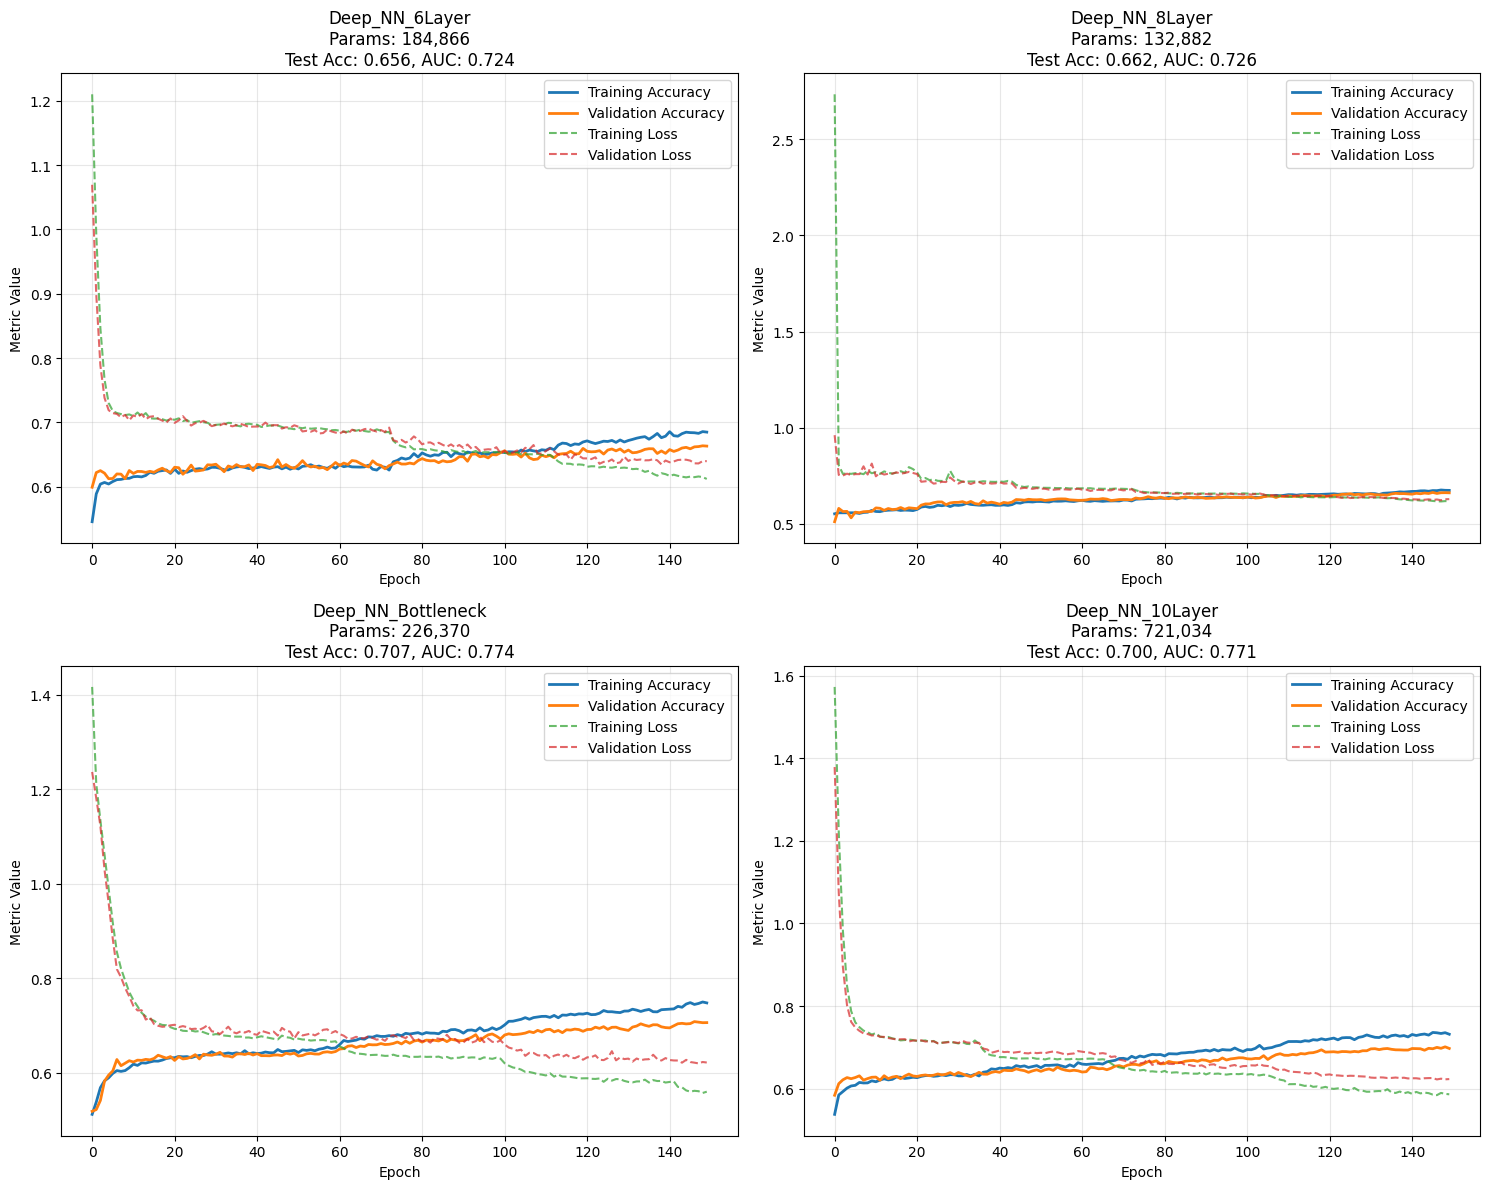


Deep Neural Networks Results:
                Model  Parameters  Layers  Test_Accuracy  Test_Loss  ROC_AUC  \
0      Deep_NN_6Layer      184866      14          0.656      0.635    0.724   
1      Deep_NN_8Layer      132882      27          0.662      0.623    0.726   
2  Deep_NN_Bottleneck      226370      19          0.707      0.620    0.774   
3     Deep_NN_10Layer      721034      21          0.700      0.622    0.771   

   Precision_0  Recall_0   F1_0  Precision_1  Recall_1   F1_1  Training_Epochs  
0        0.656     0.655  0.655        0.655     0.657  0.656              150  
1        0.639     0.744  0.687        0.693     0.580  0.631              150  
2        0.715     0.688  0.701        0.699     0.726  0.713              150  
3        0.701     0.698  0.699        0.699     0.702  0.700              150  

🎯 BEST DEEP MODEL: Deep_NN_Bottleneck
   ROC AUC: 0.774
   Accuracy: 0.707
   Parameters: 226,370
   Layers: 19
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
208/208

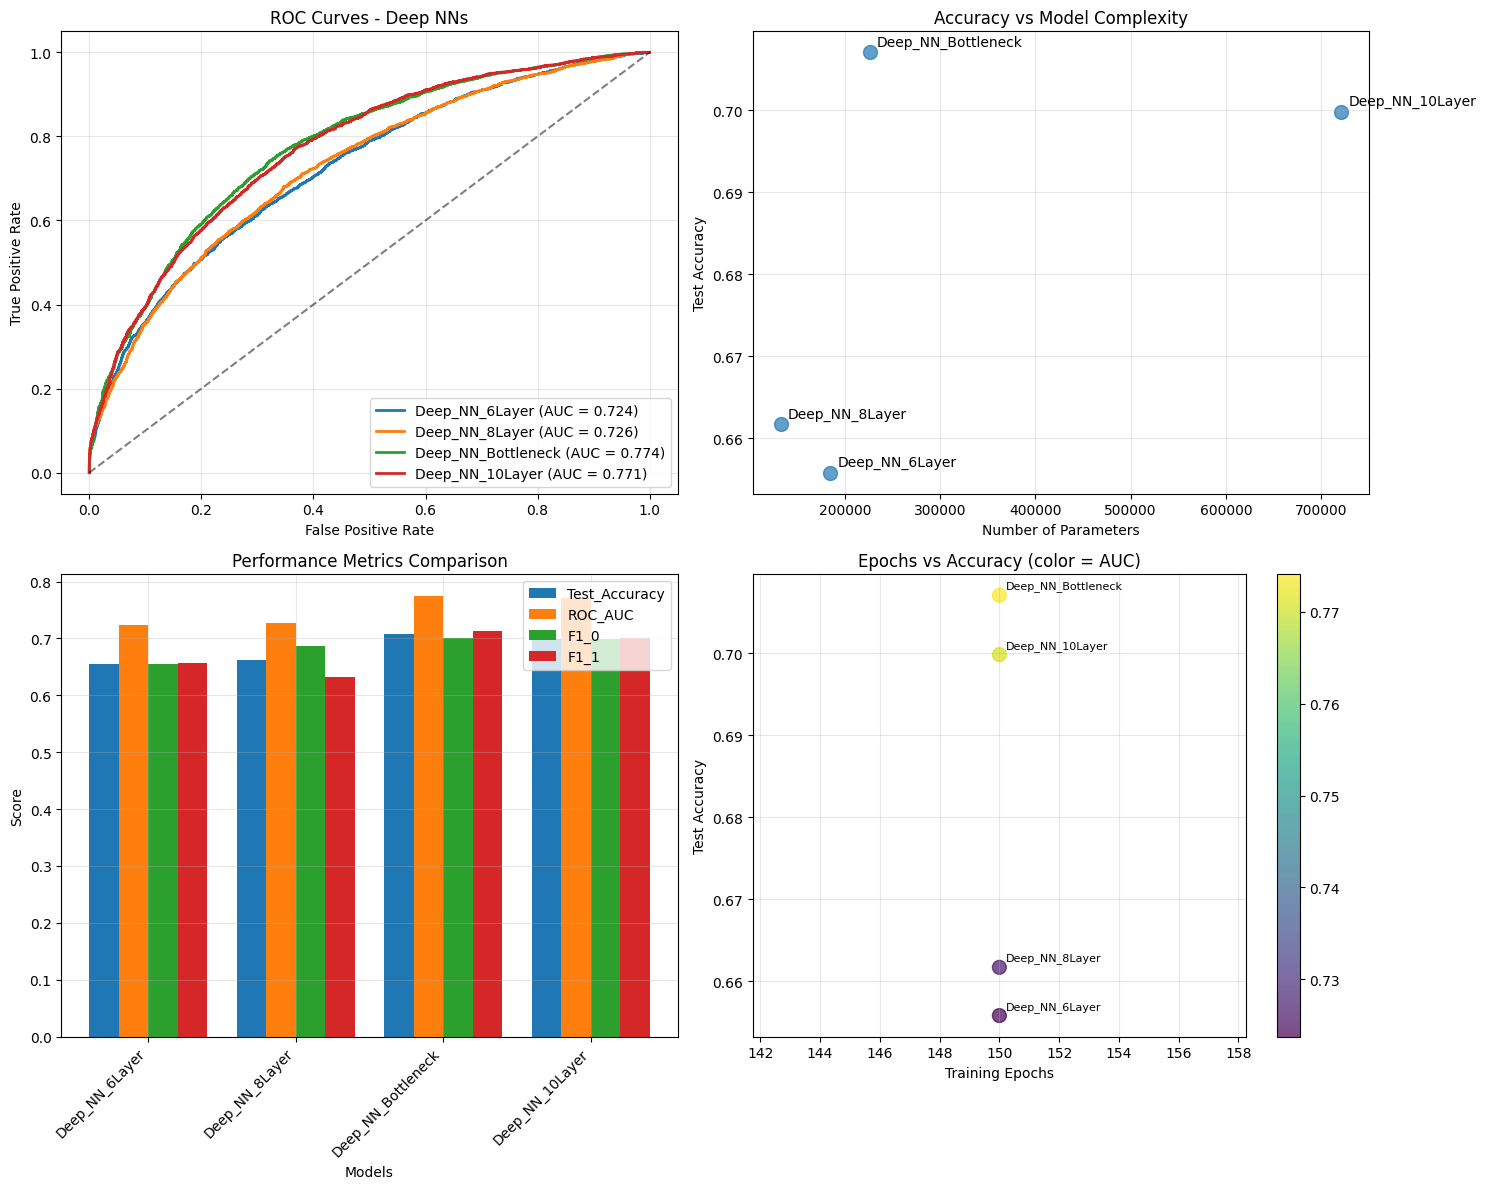

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


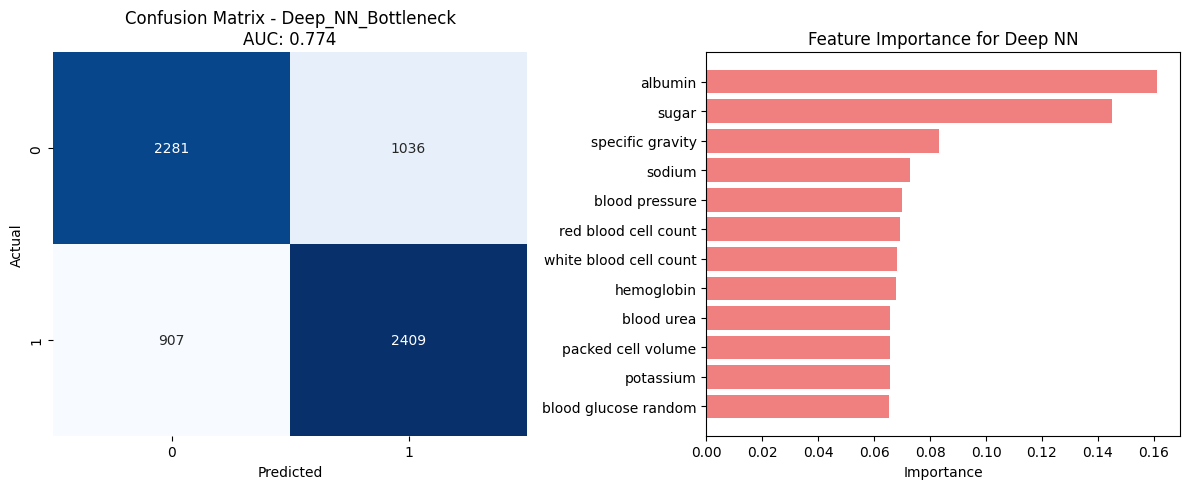


Detailed Deep Neural Networks Performance:
                Model  Parameters  Layers  Test_Accuracy  ROC_AUC   F1_0  \
0      Deep_NN_6Layer      184866      14          0.656    0.724  0.655   
1      Deep_NN_8Layer      132882      27          0.662    0.726  0.687   
2  Deep_NN_Bottleneck      226370      19          0.707    0.774  0.701   
3     Deep_NN_10Layer      721034      21          0.700    0.771  0.699   

    F1_1  Training_Epochs  
0  0.656              150  
1  0.631              150  
2  0.713              150  
3  0.700              150  

📊 Model Architecture Insights:
Average Parameters: 316,288
Average Layers: 20.2
Average Training Epochs: 150.0

🔍 Overfitting Analysis:
Deep_NN_6Layer: Train Acc 0.700 vs Test Acc 0.656 | Gap: 0.044
Deep_NN_8Layer: Train Acc 0.706 vs Test Acc 0.662 | Gap: 0.045
Deep_NN_Bottleneck: Train Acc 0.813 vs Test Acc 0.707 | Gap: 0.106
Deep_NN_10Layer: Train Acc 0.791 vs Test Acc 0.700 | Gap: 0.091


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical

print("TensorFlow Version:", tf.__version__)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline (same as shallow)
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)
    
    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()
    
    return X_selected, y_smote, selected_features, scaler, selector

# Preprocess data
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)

print("Selected Features:", selected_features)
print("Processed data shape:", X_processed.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Define deep neural network architectures
def create_deep_nn_1(input_dim):
    """Deep network with gradual decrease in units"""
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        Dropout(0.2),
        
        Dense(2, activation='softmax')
    ])
    return model

def create_deep_nn_2(input_dim):
    """Very deep network with residual-style connections"""
    model = Sequential([
        Dense(256, input_shape=(input_dim,), kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),
        
        Dense(256, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),
        
        Dense(128, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        
        Dense(128, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        
        Dense(64, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),
        
        Dense(32, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),
        
        Dense(16, activation='relu'),
        Dropout(0.1),
        
        Dense(2, activation='softmax')
    ])
    return model

def create_deep_nn_3(input_dim):
    """Bottleneck architecture"""
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),  # Bottleneck
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(2, activation='softmax')
    ])
    return model

def create_deep_nn_4(input_dim):
    """Deep network with varying layer sizes"""
    model = Sequential([
        Dense(1024, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.6),
        
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        Dropout(0.2),
        
        Dense(16, activation='relu'),
        Dropout(0.1),
        
        Dense(8, activation='relu'),
        Dropout(0.1),
        
        Dense(2, activation='softmax')
    ])
    return model

# Compile and train deep models
deep_models = {
    'Deep_NN_6Layer': create_deep_nn_1(X_train.shape[1]),
    'Deep_NN_8Layer': create_deep_nn_2(X_train.shape[1]),
    'Deep_NN_Bottleneck': create_deep_nn_3(X_train.shape[1]),
    'Deep_NN_10Layer': create_deep_nn_4(X_train.shape[1])
}

# Enhanced training configuration
epochs = 150
batch_size = 32

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1),
] + [
    ModelCheckpoint(f'best_{name}.h5', monitor='val_accuracy', save_best_only=True, verbose=0)
    for name in deep_models.keys()
]

# Train and evaluate deep models
results_deep = []

plt.figure(figsize=(15, 12))

for i, (name, model) in enumerate(deep_models.items()):
    print(f"\n{'='*60}")
    print(f"Training {name}")
    print(f"Model Parameters: {model.count_params():,}")
    print(f"{'='*60}")
    
    # Custom optimizer for deeper networks
    if '10Layer' in name or 'Bottleneck' in name:
        optimizer = Adam(learning_rate=0.0005)
    else:
        optimizer = Adam(learning_rate=0.001)
    
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train model
    history = model.fit(
        X_train, y_train_cat,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test_cat),
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)
        ],
        verbose=1
    )
    
    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results_deep.append({
        'Model': name,
        'Parameters': model.count_params(),
        'Layers': len(model.layers),
        'Test_Accuracy': test_accuracy,
        'Test_Loss': test_loss,
        'ROC_AUC': roc_auc,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
        'Training_Epochs': len(history.history['loss'])
    })
    
    # Plot training history
    plt.subplot(2, 2, i+1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.plot(history.history['loss'], label='Training Loss', linestyle='--', alpha=0.7)
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', alpha=0.7)
    plt.title(f'{name}\nParams: {model.count_params():,}\nTest Acc: {test_accuracy:.3f}, AUC: {roc_auc:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Results analysis
results_df_deep = pd.DataFrame(results_deep)
print("\nDeep Neural Networks Results:")
print("="*70)
print(results_df_deep.round(3))

# Best deep model
best_deep = results_df_deep.loc[results_df_deep['ROC_AUC'].idxmax()]
print(f"\n🎯 BEST DEEP MODEL: {best_deep['Model']}")
print(f"   ROC AUC: {best_deep['ROC_AUC']:.3f}")
print(f"   Accuracy: {best_deep['Test_Accuracy']:.3f}")
print(f"   Parameters: {best_deep['Parameters']:,}")
print(f"   Layers: {best_deep['Layers']}")

# Comprehensive comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ROC Curves
for i, (name, model) in enumerate(deep_models.items()):
    y_pred_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    axes[0, 0].plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.3f})')

axes[0, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curves - Deep NNs')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Accuracy vs Model Complexity
axes[0, 1].scatter(results_df_deep['Parameters'], results_df_deep['Test_Accuracy'], s=100, alpha=0.7)
for i, row in results_df_deep.iterrows():
    axes[0, 1].annotate(row['Model'], (row['Parameters'], row['Test_Accuracy']), 
                       xytext=(5, 5), textcoords='offset points')
axes[0, 1].set_xlabel('Number of Parameters')
axes[0, 1].set_ylabel('Test Accuracy')
axes[0, 1].set_title('Accuracy vs Model Complexity')
axes[0, 1].grid(True, alpha=0.3)

# 3. Performance metrics comparison
metrics = ['Test_Accuracy', 'ROC_AUC', 'F1_0', 'F1_1']
x = np.arange(len(results_df_deep))
width = 0.2

for j, metric in enumerate(metrics):
    values = results_df_deep[metric].values
    axes[1, 0].bar(x + j*width, values, width, label=metric)

axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Performance Metrics Comparison')
axes[1, 0].set_xticks(x + width*1.5)
axes[1, 0].set_xticklabels(results_df_deep['Model'], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Training epochs vs performance
scatter = axes[1, 1].scatter(results_df_deep['Training_Epochs'], results_df_deep['Test_Accuracy'], 
                            c=results_df_deep['ROC_AUC'], s=100, cmap='viridis', alpha=0.7)
for i, row in results_df_deep.iterrows():
    axes[1, 1].annotate(row['Model'], (row['Training_Epochs'], row['Test_Accuracy']), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 1].set_xlabel('Training Epochs')
axes[1, 1].set_ylabel('Test Accuracy')
axes[1, 1].set_title('Epochs vs Accuracy (color = AUC)')
plt.colorbar(scatter, ax=axes[1, 1])
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix for best deep model
best_deep_model_name = best_deep['Model']
best_deep_model = deep_models[best_deep_model_name]
y_pred_best_deep = np.argmax(best_deep_model.predict(X_test), axis=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best_deep)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_deep_model_name}\nAUC: {best_deep["ROC_AUC"]:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': RandomForestClassifier(random_state=42).fit(X_processed, y_processed).feature_importances_
}).sort_values('Importance', ascending=True)

plt.subplot(1, 2, 2)
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance for Deep NN')
plt.tight_layout()
plt.show()

# Final comparison table
print("\nDetailed Deep Neural Networks Performance:")
detailed_cols = ['Model', 'Parameters', 'Layers', 'Test_Accuracy', 'ROC_AUC', 
                'F1_0', 'F1_1', 'Training_Epochs']
print(results_df_deep[detailed_cols].round(3))

# Model architecture insights
print("\n📊 Model Architecture Insights:")
print(f"Average Parameters: {results_df_deep['Parameters'].mean():,.0f}")
print(f"Average Layers: {results_df_deep['Layers'].mean():.1f}")
print(f"Average Training Epochs: {results_df_deep['Training_Epochs'].mean():.1f}")

# Check for overfitting
print("\n🔍 Overfitting Analysis:")
for i, row in results_df_deep.iterrows():
    model = deep_models[row['Model']]
    train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)
    test_loss, test_acc = row['Test_Loss'], row['Test_Accuracy']
    overfit_gap = train_acc - test_acc
    print(f"{row['Model']}: Train Acc {train_acc:.3f} vs Test Acc {test_acc:.3f} | Gap: {overfit_gap:.3f}")

Game khel

TensorFlow Version: 2.20.0
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Processed data shape: (33164, 12)
Training set: (26531, 12), Test set: (6633, 12)
Epoch 1/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 1.4943

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5192 - loss: 1.3751 - val_accuracy: 0.5191 - val_loss: 1.2266 - learning_rate: 5.0000e-04
Epoch 2/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5369 - loss: 1.2173

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5416 - loss: 1.1965 - val_accuracy: 0.5230 - val_loss: 1.1786 - learning_rate: 5.0000e-04
Epoch 3/500
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5608 - loss: 1.1406

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5696 - loss: 1.1208 - val_accuracy: 0.5562 - val_loss: 1.0899 - learning_rate: 5.0000e-04
Epoch 4/500
807/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5832 - loss: 1.0678

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5888 - loss: 1.0470 - val_accuracy: 0.5746 - val_loss: 1.0348 - learning_rate: 5.0000e-04
Epoch 5/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.9982

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5926 - loss: 0.9777 - val_accuracy: 0.6076 - val_loss: 0.9428 - learning_rate: 5.0000e-04
Epoch 6/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5944 - loss: 0.9299

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5962 - loss: 0.9131 - val_accuracy: 0.6109 - val_loss: 0.8808 - learning_rate: 5.0000e-04
Epoch 7/500
805/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5966 - loss: 0.8707

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6028 - loss: 0.8543 - val_accuracy: 0.6257 - val_loss: 0.8229 - learning_rate: 5.0000e-04
Epoch 8/500
809/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6065 - loss: 0.8199

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6059 - loss: 0.8095 - val_accuracy: 0.6308 - val_loss: 0.7814 - learning_rate: 5.0000e-04
Epoch 9/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6067 - loss: 0.7794 - val_accuracy: 0.6248 - val_loss: 0.7624 - learning_rate: 5.0000e-04
Epoch 10/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6107 - loss: 0.7569 - val_accuracy: 0.6278 - val_loss: 0.7383 - learning_rate: 5.0000e-04
Epoch 11/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6158 - loss: 0.7400 - val_accuracy: 0.6260 - val_loss: 0.7241 - learning_rate: 5.0000e-04
Epoch 12/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6163 - loss: 0.7255 - val_accuracy: 0.6217 - val_loss: 0.7102 - learning_rate: 5.0000e-04
Epoch 13/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6148 - loss: 0.7210

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6184 - loss: 0.7153 - val_accuracy: 0.6309 - val_loss: 0.7125 - learning_rate: 5.0000e-04
Epoch 14/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6244 - loss: 0.7088 - val_accuracy: 0.6260 - val_loss: 0.7110 - learning_rate: 5.0000e-04
Epoch 15/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6216 - loss: 0.7025 - val_accuracy: 0.6260 - val_loss: 0.7158 - learning_rate: 5.0000e-04
Epoch 16/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6200 - loss: 0.6989 - val_accuracy: 0.6166 - val_loss: 0.7035 - learning_rate: 5.0000e-04
Epoch 17/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6236 - loss: 0.7014 - val_accuracy: 0.6237 - val_loss: 0.7056 - learning_rate: 5.0000e-04
Epoch 18/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6314 - loss: 0.6967 - val_accuracy: 0.6305 - val_loss: 0.6987 - learning_rate: 5.0000e-04
Epoch 19/500
801/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6305 - loss: 0.6929 - val_accuracy: 0.6324 - val_loss: 0.6988 - learning_rate: 5.0000e-04
Epoch 20/500
802/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6287 - loss: 0.6901

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6303 - loss: 0.6882 - val_accuracy: 0.6371 - val_loss: 0.6998 - learning_rate: 5.0000e-04
Epoch 21/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6341 - loss: 0.6860 - val_accuracy: 0.6371 - val_loss: 0.6854 - learning_rate: 5.0000e-04
Epoch 22/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6333 - loss: 0.6865 - val_accuracy: 0.6368 - val_loss: 0.6852 - learning_rate: 5.0000e-04
Epoch 23/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6368 - loss: 0.6878 - val_accuracy: 0.6252 - val_loss: 0.7086 - learning_rate: 5.0000e-04
Epoch 24/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6361 - loss: 0.6845 - val_accuracy: 0.6332 - val_loss: 0.6887 - learning_rate: 5.0000e-04
Epoch 25/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6364 - loss: 0.6901 - val_accuracy: 0.6370 - val_loss: 0.6902 - learning_rate: 5.0000e-04
Epoch 26/500
812/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6363 - loss: 0.6856 - val_accuracy: 0.6413 - val_loss: 0.6876 - learning_rate: 5.0000e-04
Epoch 27/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6353 - loss: 0.6835 - val_accuracy: 0.6288 - val_loss: 0.6890 - learning_rate: 5.0000e-04
Epoch 28/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6390 - loss: 0.6815 - val_accuracy: 0.6321 - val_loss: 0.6869 - learning_rate: 5.0000e-04
Epoch 29/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6385 - loss: 0.6791 - val_accuracy: 0.6318 - val_loss: 0.6868 - learning_rate: 5.0000e-04
Epoch 30/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6410 - loss: 0.6785 - val_accuracy: 0.6367 - val_loss: 0.6809 - learning_rate: 5.0000e-04
Epoch 31/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6396 - loss: 0.6772 - val_accuracy: 0.6410 - val_loss: 0.6800 - learning_rate: 5.0000e-04
Epoch 32/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6397 - loss: 0.6783 - val_accuracy: 0.6442 - val_loss: 0.6807 - learning_rate: 5.0000e-04
Epoch 37/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6432 - loss: 0.6769 - val_accuracy: 0.6404 - val_loss: 0.6894 - learning_rate: 5.0000e-04
Epoch 38/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6386 - loss: 0.6778 - val_accuracy: 0.6434 - val_loss: 0.6872 - learning_rate: 5.0000e-04
Epoch 39/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6415 - loss: 0.6763 - val_accuracy: 0.6385 - val_loss: 0.6818 - learning_rate: 5.0000e-04
Epoch 40/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6385 - loss: 0.6760 - val_accuracy: 0.6425 - val_loss: 0.6772 - learning_rate: 5.0000e-04
Epoch 41/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6445 - loss: 0.6761 - val_accuracy: 0.6392 - val_loss: 0.6855 - learning_rate: 5.0000e-04
Epoch 42/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6452 - loss: 0.6730 - val_accuracy: 0.6466 - val_loss: 0.6755 - learning_rate: 5.0000e-04
Epoch 44/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6494 - loss: 0.6714 - val_accuracy: 0.6463 - val_loss: 0.6803 - learning_rate: 5.0000e-04
Epoch 45/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6461 - loss: 0.6728 - val_accuracy: 0.6447 - val_loss: 0.6773 - learning_rate: 5.0000e-04
Epoch 46/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6446 - loss: 0.6735 - val_accuracy: 0.6424 - val_loss: 0.6716 - learning_rate: 5.0000e-04
Epoch 47/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6472 - loss: 0.6710 - val_accuracy: 0.6442 - val_loss: 0.6810 - learning_rate: 5.0000e-04
Epoch 48/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6457 - loss: 0.6729 - val_accuracy: 0.6444 - val_loss: 0.6858 - learning_rate: 5.0000e-04
Epoch 49/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6611 - loss: 0.6519 - val_accuracy: 0.6487 - val_loss: 0.6774 - learning_rate: 2.5000e-04
Epoch 59/500
801/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 0.6503

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6641 - loss: 0.6469 - val_accuracy: 0.6498 - val_loss: 0.6712 - learning_rate: 2.5000e-04
Epoch 60/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - loss: 0.6477

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6667 - loss: 0.6440 - val_accuracy: 0.6523 - val_loss: 0.6739 - learning_rate: 2.5000e-04
Epoch 61/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6703 - loss: 0.6431 - val_accuracy: 0.6513 - val_loss: 0.6743 - learning_rate: 2.5000e-04
Epoch 62/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6714 - loss: 0.6425 - val_accuracy: 0.6505 - val_loss: 0.6716 - learning_rate: 2.5000e-04
Epoch 63/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.6435

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6689 - loss: 0.6414 - val_accuracy: 0.6602 - val_loss: 0.6677 - learning_rate: 2.5000e-04
Epoch 64/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6754 - loss: 0.6398 - val_accuracy: 0.6573 - val_loss: 0.6672 - learning_rate: 2.5000e-04
Epoch 65/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6735 - loss: 0.6411 - val_accuracy: 0.6549 - val_loss: 0.6570 - learning_rate: 2.5000e-04
Epoch 66/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6719 - loss: 0.6388 - val_accuracy: 0.6597 - val_loss: 0.6756 - learning_rate: 2.5000e-04
Epoch 67/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6742 - loss: 0.6378 - val_accuracy: 0.6590 - val_loss: 0.6649 - learning_rate: 2.5000e-04
Epoch 68/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6787 - loss: 0.6360 - val_accuracy: 0.6575 - val_loss: 0.6723 - learning_rate: 2.5000e-04
Epoch 69/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6795 - loss: 0.6373 - val_accuracy: 0.6647 - val_loss: 0.6683 - learning_rate: 2.5000e-04
Epoch 71/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6791 - loss: 0.6362 - val_accuracy: 0.6641 - val_loss: 0.6603 - learning_rate: 2.5000e-04
Epoch 72/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6823 - loss: 0.6362 - val_accuracy: 0.6638 - val_loss: 0.6654 - learning_rate: 2.5000e-04
Epoch 73/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6783 - loss: 0.6350 - val_accuracy: 0.6633 - val_loss: 0.6629 - learning_rate: 2.5000e-04
Epoch 74/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6795 - loss: 0.6342 - val_accuracy: 0.6646 - val_loss: 0.6689 - learning_rate: 2.5000e-04
Epoch 75/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - loss: 0.6404
Epoch 75: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.678

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6836 - loss: 0.6254 - val_accuracy: 0.6695 - val_loss: 0.6573 - learning_rate: 1.2500e-04
Epoch 77/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - loss: 0.6276

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6906 - loss: 0.6206 - val_accuracy: 0.6712 - val_loss: 0.6521 - learning_rate: 1.2500e-04
Epoch 78/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - loss: 0.6246

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6922 - loss: 0.6192 - val_accuracy: 0.6725 - val_loss: 0.6506 - learning_rate: 1.2500e-04
Epoch 79/500
808/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - loss: 0.6203

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6969 - loss: 0.6134 - val_accuracy: 0.6781 - val_loss: 0.6473 - learning_rate: 1.2500e-04
Epoch 80/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6958 - loss: 0.6113 - val_accuracy: 0.6742 - val_loss: 0.6491 - learning_rate: 1.2500e-04
Epoch 81/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7030 - loss: 0.6071 - val_accuracy: 0.6756 - val_loss: 0.6395 - learning_rate: 1.2500e-04
Epoch 82/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7058 - loss: 0.6064 - val_accuracy: 0.6763 - val_loss: 0.6383 - learning_rate: 1.2500e-04
Epoch 83/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7005 - loss: 0.6106

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7006 - loss: 0.6070 - val_accuracy: 0.6795 - val_loss: 0.6327 - learning_rate: 1.2500e-04
Epoch 84/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7045 - loss: 0.6069 - val_accuracy: 0.6747 - val_loss: 0.6442 - learning_rate: 1.2500e-04
Epoch 85/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7047 - loss: 0.6048 - val_accuracy: 0.6795 - val_loss: 0.6356 - learning_rate: 1.2500e-04
Epoch 86/500
808/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7062 - loss: 0.6066

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7067 - loss: 0.6033 - val_accuracy: 0.6804 - val_loss: 0.6333 - learning_rate: 1.2500e-04
Epoch 87/500
799/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6981 - loss: 0.6094

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7028 - loss: 0.6044 - val_accuracy: 0.6833 - val_loss: 0.6362 - learning_rate: 1.2500e-04
Epoch 88/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7050 - loss: 0.6023 - val_accuracy: 0.6833 - val_loss: 0.6363 - learning_rate: 1.2500e-04
Epoch 89/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7099 - loss: 0.5991 - val_accuracy: 0.6801 - val_loss: 0.6339 - learning_rate: 1.2500e-04
Epoch 90/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7134 - loss: 0.5987 - val_accuracy: 0.6828 - val_loss: 0.6301 - learning_rate: 1.2500e-04
Epoch 91/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7082 - loss: 0.6003 - val_accuracy: 0.6795 - val_loss: 0.6308 - learning_rate: 1.2500e-04
Epoch 92/500
806/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7143 - loss: 0.5986

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7140 - loss: 0.5968 - val_accuracy: 0.6834 - val_loss: 0.6297 - learning_rate: 1.2500e-04
Epoch 93/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7112 - loss: 0.6002

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7109 - loss: 0.5979 - val_accuracy: 0.6863 - val_loss: 0.6283 - learning_rate: 1.2500e-04
Epoch 94/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7129 - loss: 0.5996 - val_accuracy: 0.6819 - val_loss: 0.6333 - learning_rate: 1.2500e-04
Epoch 95/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7158 - loss: 0.5939

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7138 - loss: 0.5941 - val_accuracy: 0.6872 - val_loss: 0.6317 - learning_rate: 1.2500e-04
Epoch 96/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7150 - loss: 0.5933 - val_accuracy: 0.6845 - val_loss: 0.6339 - learning_rate: 1.2500e-04
Epoch 97/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7178 - loss: 0.5937 - val_accuracy: 0.6855 - val_loss: 0.6350 - learning_rate: 1.2500e-04
Epoch 98/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.5973

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7173 - loss: 0.5940 - val_accuracy: 0.6876 - val_loss: 0.6288 - learning_rate: 1.2500e-04
Epoch 99/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7153 - loss: 0.5932 - val_accuracy: 0.6872 - val_loss: 0.6297 - learning_rate: 1.2500e-04
Epoch 100/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7076 - loss: 0.6019

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7128 - loss: 0.5974 - val_accuracy: 0.6926 - val_loss: 0.6285 - learning_rate: 1.2500e-04
Epoch 101/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7167 - loss: 0.5924 - val_accuracy: 0.6905 - val_loss: 0.6266 - learning_rate: 1.2500e-04
Epoch 102/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7162 - loss: 0.5933 - val_accuracy: 0.6888 - val_loss: 0.6303 - learning_rate: 1.2500e-04
Epoch 103/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7208 - loss: 0.5888 - val_accuracy: 0.6908 - val_loss: 0.6304 - learning_rate: 1.2500e-04
Epoch 104/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7185 - loss: 0.5915 - val_accuracy: 0.6926 - val_loss: 0.6257 - learning_rate: 1.2500e-04
Epoch 105/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7207 - loss: 0.5888 - val_accuracy: 0.6896 - val_loss: 0.6273 - learning_rate: 1.2500e-04
Epoch 106/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7225 - loss: 0.5861 - val_accuracy: 0.6979 - val_loss: 0.6240 - learning_rate: 1.2500e-04
Epoch 107/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7196 - loss: 0.5893 - val_accuracy: 0.6965 - val_loss: 0.6231 - learning_rate: 1.2500e-04
Epoch 108/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7219 - loss: 0.5899 - val_accuracy: 0.6920 - val_loss: 0.6229 - learning_rate: 1.2500e-04
Epoch 109/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7206 - loss: 0.5890 - val_accuracy: 0.6952 - val_loss: 0.6255 - learning_rate: 1.2500e-04
Epoch 110/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7221 - loss: 0.5885 - val_accuracy: 0.6918 - val_loss: 0.6252 - learning_rate: 1.2500e-04
Epoch 111/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7192 - loss: 0.5908 - val_accuracy: 0.6941 - val_loss: 0.6262 - learning_rate: 1.2500e-04
Epoch 112/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7224 - loss: 0.5871 - val_accuracy: 0.6988 - val_loss: 0.6214 - learning_rate: 1.2500e-04
Epoch 118/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7267 - loss: 0.5838 - val_accuracy: 0.6938 - val_loss: 0.6225 - learning_rate: 1.2500e-04
Epoch 119/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7270 - loss: 0.5845 - val_accuracy: 0.6959 - val_loss: 0.6212 - learning_rate: 1.2500e-04
Epoch 120/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7259 - loss: 0.5842 - val_accuracy: 0.6976 - val_loss: 0.6204 - learning_rate: 1.2500e-04
Epoch 121/500
806/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7255 - loss: 0.5882

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7264 - loss: 0.5852 - val_accuracy: 0.6991 - val_loss: 0.6219 - learning_rate: 1.2500e-04
Epoch 122/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7285 - loss: 0.5822 - val_accuracy: 0.6980 - val_loss: 0.6194 - learning_rate: 1.2500e-04
Epoch 123/500
808/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7238 - loss: 0.5904

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7227 - loss: 0.5868 - val_accuracy: 0.7003 - val_loss: 0.6196 - learning_rate: 1.2500e-04
Epoch 124/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7190 - loss: 0.5881

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7235 - loss: 0.5862 - val_accuracy: 0.7010 - val_loss: 0.6209 - learning_rate: 1.2500e-04
Epoch 125/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7302 - loss: 0.5808 - val_accuracy: 0.6986 - val_loss: 0.6190 - learning_rate: 1.2500e-04
Epoch 126/500
810/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7284 - loss: 0.5860

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7277 - loss: 0.5816 - val_accuracy: 0.7054 - val_loss: 0.6184 - learning_rate: 1.2500e-04
Epoch 127/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7314 - loss: 0.5840 - val_accuracy: 0.7053 - val_loss: 0.6228 - learning_rate: 1.2500e-04
Epoch 128/500
813/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7315 - loss: 0.5833

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7325 - loss: 0.5807 - val_accuracy: 0.7069 - val_loss: 0.6200 - learning_rate: 1.2500e-04
Epoch 129/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7314 - loss: 0.5814 - val_accuracy: 0.6989 - val_loss: 0.6183 - learning_rate: 1.2500e-04
Epoch 130/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7297 - loss: 0.5806 - val_accuracy: 0.7006 - val_loss: 0.6212 - learning_rate: 1.2500e-04
Epoch 131/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7280 - loss: 0.5822 - val_accuracy: 0.6980 - val_loss: 0.6212 - learning_rate: 1.2500e-04
Epoch 132/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7328 - loss: 0.5806 - val_accuracy: 0.7039 - val_loss: 0.6180 - learning_rate: 1.2500e-04
Epoch 133/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7304 - loss: 0.5823

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7307 - loss: 0.5802 - val_accuracy: 0.7087 - val_loss: 0.6157 - learning_rate: 1.2500e-04
Epoch 134/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7261 - loss: 0.5841 - val_accuracy: 0.7035 - val_loss: 0.6172 - learning_rate: 1.2500e-04
Epoch 135/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7302 - loss: 0.5803 - val_accuracy: 0.7024 - val_loss: 0.6269 - learning_rate: 1.2500e-04
Epoch 136/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7310 - loss: 0.5799 - val_accuracy: 0.7045 - val_loss: 0.6189 - learning_rate: 1.2500e-04
Epoch 137/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7338 - loss: 0.5792 - val_accuracy: 0.7042 - val_loss: 0.6251 - learning_rate: 1.2500e-04
Epoch 138/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7295 - loss: 0.5808 - val_accuracy: 0.7074 - val_loss: 0.6170 - learning_rate: 1.2500e-04
Epoch 139/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7391 - loss: 0.5727 - val_accuracy: 0.7098 - val_loss: 0.6139 - learning_rate: 6.2500e-05
Epoch 145/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7387 - loss: 0.5706

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7428 - loss: 0.5675 - val_accuracy: 0.7111 - val_loss: 0.6119 - learning_rate: 6.2500e-05
Epoch 146/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7448 - loss: 0.5642 - val_accuracy: 0.7096 - val_loss: 0.6123 - learning_rate: 6.2500e-05
Epoch 147/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7462 - loss: 0.5579 - val_accuracy: 0.7105 - val_loss: 0.6102 - learning_rate: 6.2500e-05
Epoch 148/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7477 - loss: 0.5597 - val_accuracy: 0.7096 - val_loss: 0.6097 - learning_rate: 6.2500e-05
Epoch 149/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7501 - loss: 0.5598

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7508 - loss: 0.5577 - val_accuracy: 0.7125 - val_loss: 0.6102 - learning_rate: 6.2500e-05
Epoch 150/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7452 - loss: 0.5608

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7474 - loss: 0.5552 - val_accuracy: 0.7130 - val_loss: 0.6072 - learning_rate: 6.2500e-05
Epoch 151/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - loss: 0.5593

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7515 - loss: 0.5558 - val_accuracy: 0.7142 - val_loss: 0.6071 - learning_rate: 6.2500e-05
Epoch 152/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7530 - loss: 0.5530 - val_accuracy: 0.7123 - val_loss: 0.6061 - learning_rate: 6.2500e-05
Epoch 153/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7504 - loss: 0.5564

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7506 - loss: 0.5524 - val_accuracy: 0.7185 - val_loss: 0.6053 - learning_rate: 6.2500e-05
Epoch 154/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7537 - loss: 0.5514 - val_accuracy: 0.7173 - val_loss: 0.6040 - learning_rate: 6.2500e-05
Epoch 155/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7537 - loss: 0.5495 - val_accuracy: 0.7169 - val_loss: 0.6068 - learning_rate: 6.2500e-05
Epoch 156/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7549 - loss: 0.5507 - val_accuracy: 0.7173 - val_loss: 0.6055 - learning_rate: 6.2500e-05
Epoch 157/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7547 - loss: 0.5483 - val_accuracy: 0.7143 - val_loss: 0.6048 - learning_rate: 6.2500e-05
Epoch 158/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7558 - loss: 0.5504

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7529 - loss: 0.5518 - val_accuracy: 0.7187 - val_loss: 0.6027 - learning_rate: 6.2500e-05
Epoch 159/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7538 - loss: 0.5462 - val_accuracy: 0.7166 - val_loss: 0.6051 - learning_rate: 6.2500e-05
Epoch 160/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7538 - loss: 0.5490 - val_accuracy: 0.7154 - val_loss: 0.6047 - learning_rate: 6.2500e-05
Epoch 161/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7539 - loss: 0.5476 - val_accuracy: 0.7181 - val_loss: 0.6019 - learning_rate: 6.2500e-05
Epoch 162/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7601 - loss: 0.5425 - val_accuracy: 0.7157 - val_loss: 0.6073 - learning_rate: 6.2500e-05
Epoch 163/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7534 - loss: 0.5457 - val_accuracy: 0.7182 - val_loss: 0.6004 - learning_rate: 6.2500e-05
Epoch 164/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7563 - loss: 0.5452 - val_accuracy: 0.7190 - val_loss: 0.5982 - learning_rate: 6.2500e-05
Epoch 167/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7534 - loss: 0.5427 - val_accuracy: 0.7170 - val_loss: 0.6001 - learning_rate: 6.2500e-05
Epoch 168/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.5417

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7594 - loss: 0.5380 - val_accuracy: 0.7194 - val_loss: 0.6013 - learning_rate: 6.2500e-05
Epoch 169/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7562 - loss: 0.5412 - val_accuracy: 0.7190 - val_loss: 0.5999 - learning_rate: 6.2500e-05
Epoch 170/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7599 - loss: 0.5414 - val_accuracy: 0.7194 - val_loss: 0.6008 - learning_rate: 6.2500e-05
Epoch 171/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7569 - loss: 0.5432 - val_accuracy: 0.7172 - val_loss: 0.6001 - learning_rate: 6.2500e-05
Epoch 172/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7601 - loss: 0.5397 - val_accuracy: 0.7178 - val_loss: 0.6013 - learning_rate: 6.2500e-05
Epoch 173/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7554 - loss: 0.5451 - val_accuracy: 0.7172 - val_loss: 0.5995 - learning_rate: 6.2500e-05
Epoch 174/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7591 - loss: 0.5411 - val_accuracy: 0.7200 - val_loss: 0.6009 - learning_rate: 6.2500e-05
Epoch 175/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7613 - loss: 0.5343 - val_accuracy: 0.7184 - val_loss: 0.5992 - learning_rate: 6.2500e-05
Epoch 176/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 0.5427

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7613 - loss: 0.5429 - val_accuracy: 0.7217 - val_loss: 0.5946 - learning_rate: 6.2500e-05
Epoch 177/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7599 - loss: 0.5400 - val_accuracy: 0.7166 - val_loss: 0.5965 - learning_rate: 6.2500e-05
Epoch 178/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7584 - loss: 0.5360 - val_accuracy: 0.7182 - val_loss: 0.5957 - learning_rate: 6.2500e-05
Epoch 179/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7599 - loss: 0.5372 - val_accuracy: 0.7170 - val_loss: 0.5949 - learning_rate: 6.2500e-05
Epoch 180/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7641 - loss: 0.5369 - val_accuracy: 0.7188 - val_loss: 0.5953 - learning_rate: 6.2500e-05
Epoch 181/500
820/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7605 - loss: 0.5425

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7628 - loss: 0.5391 - val_accuracy: 0.7224 - val_loss: 0.5970 - learning_rate: 6.2500e-05
Epoch 182/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.5389

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7589 - loss: 0.5389 - val_accuracy: 0.7238 - val_loss: 0.5942 - learning_rate: 6.2500e-05
Epoch 183/500
808/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7622 - loss: 0.5392

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7622 - loss: 0.5375 - val_accuracy: 0.7264 - val_loss: 0.5941 - learning_rate: 6.2500e-05
Epoch 184/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 0.5434

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7597 - loss: 0.5382 - val_accuracy: 0.7267 - val_loss: 0.5929 - learning_rate: 6.2500e-05
Epoch 185/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7611 - loss: 0.5381 - val_accuracy: 0.7214 - val_loss: 0.5965 - learning_rate: 6.2500e-05
Epoch 186/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7598 - loss: 0.5335 - val_accuracy: 0.7203 - val_loss: 0.5938 - learning_rate: 6.2500e-05
Epoch 187/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7618 - loss: 0.5355 - val_accuracy: 0.7224 - val_loss: 0.5935 - learning_rate: 6.2500e-05
Epoch 188/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7618 - loss: 0.5373 - val_accuracy: 0.7262 - val_loss: 0.5928 - learning_rate: 6.2500e-05
Epoch 189/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7656 - loss: 0.5285 - val_accuracy: 0.7205 - val_loss: 0.5966 - learning_rate: 6.2500e-05
Epoch 190/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7635 - loss: 0.5338 - val_accuracy: 0.7270 - val_loss: 0.5918 - learning_rate: 6.2500e-05
Epoch 192/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7640 - loss: 0.5310 - val_accuracy: 0.7264 - val_loss: 0.5929 - learning_rate: 6.2500e-05
Epoch 193/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7665 - loss: 0.5296 - val_accuracy: 0.7247 - val_loss: 0.5925 - learning_rate: 6.2500e-05
Epoch 194/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7603 - loss: 0.5335 - val_accuracy: 0.7252 - val_loss: 0.5924 - learning_rate: 6.2500e-05
Epoch 195/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7625 - loss: 0.5330 - val_accuracy: 0.7246 - val_loss: 0.5943 - learning_rate: 6.2500e-05
Epoch 196/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7641 - loss: 0.5338 - val_accuracy: 0.7231 - val_loss: 0.5943 - learning_rate: 6.2500e-05
Epoch 197/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7667 - loss: 0.5295 - val_accuracy: 0.7300 - val_loss: 0.5925 - learning_rate: 6.2500e-05
Epoch 199/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7616 - loss: 0.5323 - val_accuracy: 0.7283 - val_loss: 0.5909 - learning_rate: 6.2500e-05
Epoch 200/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7627 - loss: 0.5335 - val_accuracy: 0.7273 - val_loss: 0.5920 - learning_rate: 6.2500e-05
Epoch 201/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7652 - loss: 0.5288 - val_accuracy: 0.7280 - val_loss: 0.5921 - learning_rate: 6.2500e-05
Epoch 202/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7630 - loss: 0.5325 - val_accuracy: 0.7255 - val_loss: 0.5932 - learning_rate: 6.2500e-05
Epoch 203/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7642 - loss: 0.5297 - val_accuracy: 0.7234 - val_loss: 0.5942 - learning_rate: 6.2500e-05
Epoch 204/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7768 - loss: 0.5110 - val_accuracy: 0.7315 - val_loss: 0.5858 - learning_rate: 3.1250e-05
Epoch 231/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7762 - loss: 0.5102 - val_accuracy: 0.7313 - val_loss: 0.5856 - learning_rate: 3.1250e-05
Epoch 232/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7746 - loss: 0.5169 - val_accuracy: 0.7292 - val_loss: 0.5857 - learning_rate: 3.1250e-05
Epoch 233/500
812/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7749 - loss: 0.5106

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7743 - loss: 0.5124 - val_accuracy: 0.7316 - val_loss: 0.5835 - learning_rate: 3.1250e-05
Epoch 234/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7780 - loss: 0.5093 - val_accuracy: 0.7309 - val_loss: 0.5857 - learning_rate: 3.1250e-05
Epoch 235/500
809/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7688 - loss: 0.5269

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7744 - loss: 0.5162 - val_accuracy: 0.7325 - val_loss: 0.5830 - learning_rate: 3.1250e-05
Epoch 236/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.5163

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7791 - loss: 0.5086 - val_accuracy: 0.7330 - val_loss: 0.5844 - learning_rate: 3.1250e-05
Epoch 237/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7748 - loss: 0.5119 - val_accuracy: 0.7300 - val_loss: 0.5847 - learning_rate: 3.1250e-05
Epoch 238/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7799 - loss: 0.5093

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7789 - loss: 0.5089 - val_accuracy: 0.7339 - val_loss: 0.5844 - learning_rate: 3.1250e-05
Epoch 239/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.5127

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7769 - loss: 0.5076 - val_accuracy: 0.7354 - val_loss: 0.5847 - learning_rate: 3.1250e-05
Epoch 240/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7753 - loss: 0.5101 - val_accuracy: 0.7310 - val_loss: 0.5845 - learning_rate: 3.1250e-05
Epoch 241/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7801 - loss: 0.5069 - val_accuracy: 0.7329 - val_loss: 0.5842 - learning_rate: 3.1250e-05
Epoch 242/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7770 - loss: 0.5051 - val_accuracy: 0.7300 - val_loss: 0.5860 - learning_rate: 3.1250e-05
Epoch 243/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7786 - loss: 0.5101 - val_accuracy: 0.7306 - val_loss: 0.5824 - learning_rate: 3.1250e-05
Epoch 244/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7783 - loss: 0.5050 - val_accuracy: 0.7318 - val_loss: 0.5855 - learning_rate: 3.1250e-05
Epoch 245/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7833 - loss: 0.5011 - val_accuracy: 0.7365 - val_loss: 0.5816 - learning_rate: 3.1250e-05
Epoch 264/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7819 - loss: 0.5010 - val_accuracy: 0.7338 - val_loss: 0.5812 - learning_rate: 3.1250e-05
Epoch 265/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7848 - loss: 0.4967 - val_accuracy: 0.7351 - val_loss: 0.5825 - learning_rate: 3.1250e-05
Epoch 266/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7776 - loss: 0.5063 - val_accuracy: 0.7335 - val_loss: 0.5811 - learning_rate: 3.1250e-05
Epoch 267/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7844 - loss: 0.5004
Epoch 267: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7847 - loss: 0.4974 - val_accuracy: 0.7325 - val_loss: 0.5811 - learning_rate: 3.1250e-05
Epoch 268/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7889 - loss: 0.4931 - val_accuracy: 0.7368 - val_loss: 0.5785 - learning_rate: 1.5625e-05
Epoch 273/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7894 - loss: 0.4920 - val_accuracy: 0.7366 - val_loss: 0.5808 - learning_rate: 1.5625e-05
Epoch 274/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7822 - loss: 0.4977

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7856 - loss: 0.4952 - val_accuracy: 0.7377 - val_loss: 0.5801 - learning_rate: 1.5625e-05
Epoch 275/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.4972

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7876 - loss: 0.4966 - val_accuracy: 0.7378 - val_loss: 0.5793 - learning_rate: 1.5625e-05
Epoch 276/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7913 - loss: 0.4889 - val_accuracy: 0.7368 - val_loss: 0.5797 - learning_rate: 1.5625e-05
Epoch 277/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4897

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7927 - loss: 0.4875 - val_accuracy: 0.7383 - val_loss: 0.5793 - learning_rate: 1.5625e-05
Epoch 278/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.4975

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7874 - loss: 0.4931 - val_accuracy: 0.7387 - val_loss: 0.5769 - learning_rate: 1.5625e-05
Epoch 279/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7873 - loss: 0.4912 - val_accuracy: 0.7366 - val_loss: 0.5781 - learning_rate: 1.5625e-05
Epoch 280/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7858 - loss: 0.4906 - val_accuracy: 0.7357 - val_loss: 0.5773 - learning_rate: 1.5625e-05
Epoch 281/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7867 - loss: 0.4936 - val_accuracy: 0.7371 - val_loss: 0.5778 - learning_rate: 1.5625e-05
Epoch 282/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7880 - loss: 0.4911 - val_accuracy: 0.7363 - val_loss: 0.5783 - learning_rate: 1.5625e-05
Epoch 283/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7892 - loss: 0.4900 - val_accuracy: 0.7371 - val_loss: 0.5781 - learning_rate: 1.5625e-05
Epoch 284/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7908 - loss: 0.4877 - val_accuracy: 0.7398 - val_loss: 0.5773 - learning_rate: 1.5625e-05
Epoch 289/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7835 - loss: 0.4938 - val_accuracy: 0.7371 - val_loss: 0.5761 - learning_rate: 7.8125e-06
Epoch 290/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7920 - loss: 0.4832 - val_accuracy: 0.7390 - val_loss: 0.5761 - learning_rate: 7.8125e-06
Epoch 291/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7918 - loss: 0.4879 - val_accuracy: 0.7392 - val_loss: 0.5771 - learning_rate: 7.8125e-06
Epoch 292/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7826 - loss: 0.4975

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7858 - loss: 0.4929 - val_accuracy: 0.7408 - val_loss: 0.5750 - learning_rate: 7.8125e-06
Epoch 293/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4906

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7925 - loss: 0.4856 - val_accuracy: 0.7427 - val_loss: 0.5759 - learning_rate: 7.8125e-06
Epoch 294/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7931 - loss: 0.4826 - val_accuracy: 0.7402 - val_loss: 0.5775 - learning_rate: 7.8125e-06
Epoch 295/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7945 - loss: 0.4827 - val_accuracy: 0.7396 - val_loss: 0.5782 - learning_rate: 7.8125e-06
Epoch 296/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7901 - loss: 0.4881 - val_accuracy: 0.7398 - val_loss: 0.5777 - learning_rate: 7.8125e-06
Epoch 297/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7911 - loss: 0.4876 - val_accuracy: 0.7384 - val_loss: 0.5762 - learning_rate: 7.8125e-06
Epoch 298/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7916 - loss: 0.4890 - val_accuracy: 0.7395 - val_loss: 0.5761 - learning_rate: 7.8125e-06
Epoch 299/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc

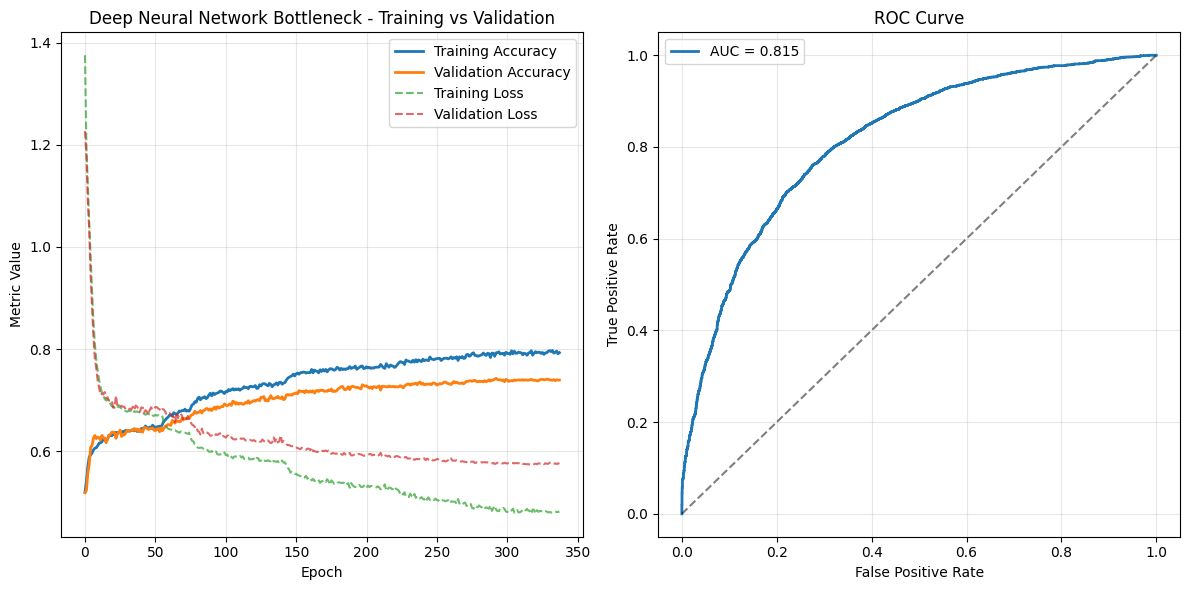

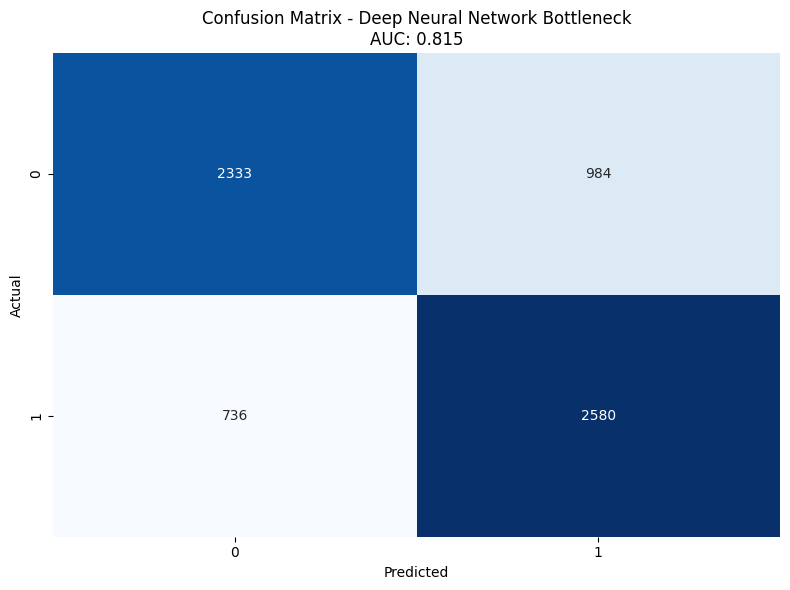

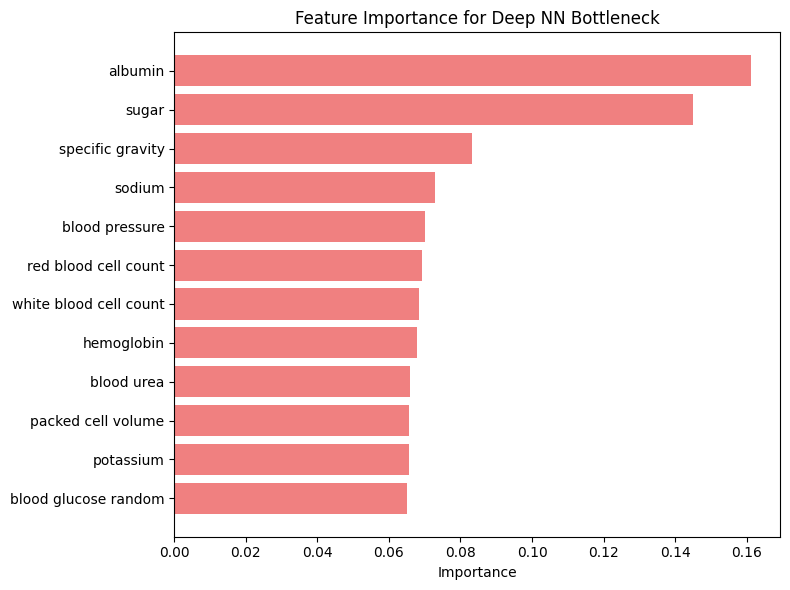


Deep Neural Network Bottleneck Results:
Test Accuracy: 0.741
ROC AUC: 0.815
Model Parameters: 226,370
Number of Layers: 19


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical

print("TensorFlow Version:", tf.__version__)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline (same as shallow)
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)
    
    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()
    
    return X_selected, y_smote, selected_features, scaler, selector

# Preprocess data
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)

print("Selected Features:", selected_features)
print("Processed data shape:", X_processed.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Define deep neural network architecture (Bottleneck)
def create_deep_nn_bottleneck(input_dim):
    """Bottleneck architecture"""
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),  # Bottleneck
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(2, activation='softmax')
    ])
    return model

# Create and compile the deep neural network model
model = create_deep_nn_bottleneck(X_train.shape[1])

# Enhanced training configuration
epochs = 500
batch_size = 32

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1),
    ModelCheckpoint('best_deep_nn_bottleneck.h5', monitor='val_accuracy', save_best_only=True, verbose=0)
]

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test_cat),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
report = classification_report(y_test, y_pred, output_dict=True)

# Display results
print("\nDeep Neural Network Bottleneck - ROC AUC:", roc_auc)
print("Deep Neural Network Bottleneck - Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 6))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', alpha=0.7)
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', alpha=0.7)
plt.title('Deep Neural Network Bottleneck - Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, alpha=0.3)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Deep Neural Network Bottleneck\nAUC: {roc_auc:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (using RandomForest for feature importance ranking)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_processed, y_processed)
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance for Deep NN Bottleneck')
plt.tight_layout()
plt.show()

# Final analysis
print("\nDeep Neural Network Bottleneck Results:")
print("="*70)
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Model Parameters: {model.count_params():,}")
print(f"Number of Layers: {len(model.layers)}")


# More Layed added still performance low !!

Epoch 1/100
824/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4981 - loss: 10.5850

830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5035 - loss: 9.3298 - val_accuracy: 0.4996 - val_loss: 6.7786 - learning_rate: 5.0000e-04
Epoch 2/100
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5238 - loss: 5.9699

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5359 - loss: 5.0923 - val_accuracy: 0.5035 - val_loss: 3.5795 - learning_rate: 5.0000e-04
Epoch 3/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5436 - loss: 3.0882

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5549 - loss: 2.6988 - val_accuracy: 0.5446 - val_loss: 2.1078 - learning_rate: 5.0000e-04
Epoch 4/100
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5597 - loss: 2.0307

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5673 - loss: 1.8804 - val_accuracy: 0.5827 - val_loss: 1.6319 - learning_rate: 5.0000e-04
Epoch 5/100
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5646 - loss: 1.6270

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5739 - loss: 1.5406 - val_accuracy: 0.5886 - val_loss: 1.3867 - learning_rate: 5.0000e-04
Epoch 6/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5743 - loss: 1.3179 - val_accuracy: 0.5883 - val_loss: 1.2234 - learning_rate: 5.0000e-04
Epoch 7/100
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5716 - loss: 1.3074

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5790 - loss: 1.2489 - val_accuracy: 0.6153 - val_loss: 1.1375 - learning_rate: 5.0000e-04
Epoch 8/100
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5794 - loss: 1.2325

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5795 - loss: 1.1839 - val_accuracy: 0.6154 - val_loss: 1.0905 - learning_rate: 5.0000e-04
Epoch 9/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5831 - loss: 1.0881 - val_accuracy: 0.6144 - val_loss: 1.0071 - learning_rate: 5.0000e-04
Epoch 10/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5869 - loss: 1.0120 - val_accuracy: 0.6116 - val_loss: 0.9568 - learning_rate: 5.0000e-04
Epoch 11/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5803 - loss: 1.0596 - val_accuracy: 0.6039 - val_loss: 0.9850 - learning_rate: 5.0000e-04
Epoch 12/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5858 - loss: 0.9497 - val_accuracy: 0.6125 - val_loss: 0.9105 - learning_rate: 5.0000e-04
Epoch 13/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5874 - loss: 0.9212 - val_accuracy: 0.6065 - val_loss: 0.8717 - learning_rate: 5.0000e-04
Epoch 14/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5932 - loss: 0.8185 - val_accuracy: 0.6276 - val_loss: 0.7928 - learning_rate: 5.0000e-04
Epoch 23/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5973 - loss: 0.8072 - val_accuracy: 0.6100 - val_loss: 0.8034 - learning_rate: 5.0000e-04
Epoch 24/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5987 - loss: 0.8119 - val_accuracy: 0.6079 - val_loss: 0.7901 - learning_rate: 5.0000e-04
Epoch 25/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6003 - loss: 0.7949 - val_accuracy: 0.6234 - val_loss: 0.7762 - learning_rate: 5.0000e-04
Epoch 26/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5954 - loss: 0.7945 - val_accuracy: 0.6160 - val_loss: 0.7841 - learning_rate: 5.0000e-04
Epoch 27/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5953 - loss: 0.8137 - val_accuracy: 0.6210 - val_loss: 0.7910 - learning_rate: 5.0000e-04
Epoch 28/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6062 - loss: 0.7203 - val_accuracy: 0.6293 - val_loss: 0.7093 - learning_rate: 5.0000e-04
Epoch 53/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6042 - loss: 0.7214 - val_accuracy: 0.6202 - val_loss: 0.7158 - learning_rate: 5.0000e-04
Epoch 54/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6068 - loss: 0.7330 - val_accuracy: 0.6255 - val_loss: 0.7095 - learning_rate: 5.0000e-04
Epoch 55/100
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6011 - loss: 0.7283

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6045 - loss: 0.7222 - val_accuracy: 0.6303 - val_loss: 0.7057 - learning_rate: 5.0000e-04
Epoch 56/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6077 - loss: 0.7148 - val_accuracy: 0.6264 - val_loss: 0.7017 - learning_rate: 5.0000e-04
Epoch 57/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6054 - loss: 0.7242 - val_accuracy: 0.6228 - val_loss: 0.7063 - learning_rate: 5.0000e-04
Epoch 58/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6023 - loss: 0.7180 - val_accuracy: 0.6183 - val_loss: 0.7064 - learning_rate: 5.0000e-04
Epoch 59/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6013 - loss: 0.7119 - val_accuracy: 0.6237 - val_loss: 0.6988 - learning_rate: 5.0000e-04
Epoch 60/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6035 - loss: 0.7121 - val_accuracy: 0.6249 - val_loss: 0.7041 - learning_rate: 5.0000e-04
Epoch 61/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6145 - loss: 0.6980 - val_accuracy: 0.6311 - val_loss: 0.6835 - learning_rate: 2.5000e-04
Epoch 66/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6152 - loss: 0.6891 - val_accuracy: 0.6308 - val_loss: 0.6826 - learning_rate: 2.5000e-04
Epoch 67/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6181 - loss: 0.6881 - val_accuracy: 0.6284 - val_loss: 0.6826 - learning_rate: 2.5000e-04
Epoch 68/100
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6137 - loss: 0.6902

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6158 - loss: 0.6869 - val_accuracy: 0.6347 - val_loss: 0.6815 - learning_rate: 2.5000e-04
Epoch 69/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6221 - loss: 0.6837 - val_accuracy: 0.6302 - val_loss: 0.6815 - learning_rate: 2.5000e-04
Epoch 70/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6207 - loss: 0.6851 - val_accuracy: 0.6257 - val_loss: 0.6829 - learning_rate: 2.5000e-04
Epoch 71/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6231 - loss: 0.6817 - val_accuracy: 0.6312 - val_loss: 0.6741 - learning_rate: 2.5000e-04
Epoch 72/100
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6167 - loss: 0.6850

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6197 - loss: 0.6833 - val_accuracy: 0.6359 - val_loss: 0.6761 - learning_rate: 2.5000e-04
Epoch 73/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6235 - loss: 0.6815 - val_accuracy: 0.6266 - val_loss: 0.6791 - learning_rate: 2.5000e-04
Epoch 74/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6227 - loss: 0.6805 - val_accuracy: 0.6338 - val_loss: 0.6758 - learning_rate: 2.5000e-04
Epoch 75/100
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6207 - loss: 0.6831

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6276 - loss: 0.6796 - val_accuracy: 0.6362 - val_loss: 0.6723 - learning_rate: 2.5000e-04
Epoch 76/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6234 - loss: 0.6792 - val_accuracy: 0.6341 - val_loss: 0.6762 - learning_rate: 2.5000e-04
Epoch 77/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6209 - loss: 0.6810 - val_accuracy: 0.6306 - val_loss: 0.6749 - learning_rate: 2.5000e-04
Epoch 78/100
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6207 - loss: 0.6811

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6226 - loss: 0.6794 - val_accuracy: 0.6382 - val_loss: 0.6794 - learning_rate: 2.5000e-04
Epoch 79/100
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6278 - loss: 0.6831

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6274 - loss: 0.6805 - val_accuracy: 0.6401 - val_loss: 0.6714 - learning_rate: 2.5000e-04
Epoch 80/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6257 - loss: 0.6794 - val_accuracy: 0.6352 - val_loss: 0.6700 - learning_rate: 2.5000e-04
Epoch 81/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6242 - loss: 0.6767 - val_accuracy: 0.6318 - val_loss: 0.6704 - learning_rate: 2.5000e-04
Epoch 82/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6249 - loss: 0.6800 - val_accuracy: 0.6359 - val_loss: 0.6724 - learning_rate: 2.5000e-04
Epoch 83/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6239 - loss: 0.6768 - val_accuracy: 0.6397 - val_loss: 0.6696 - learning_rate: 2.5000e-04
Epoch 84/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6287 - loss: 0.6769 - val_accuracy: 0.6361 - val_loss: 0.6724 - learning_rate: 2.5000e-04
Epoch 85/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy:

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6286 - loss: 0.6766 - val_accuracy: 0.6418 - val_loss: 0.6675 - learning_rate: 2.5000e-04
Epoch 88/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6263 - loss: 0.6755 - val_accuracy: 0.6368 - val_loss: 0.6679 - learning_rate: 2.5000e-04
Epoch 89/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6226 - loss: 0.6787 - val_accuracy: 0.6374 - val_loss: 0.6714 - learning_rate: 2.5000e-04
Epoch 90/100
813/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6285 - loss: 0.6770

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6278 - loss: 0.6763 - val_accuracy: 0.6421 - val_loss: 0.6677 - learning_rate: 2.5000e-04
Epoch 91/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6293 - loss: 0.6756 - val_accuracy: 0.6361 - val_loss: 0.6678 - learning_rate: 2.5000e-04
Epoch 92/100
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6284 - loss: 0.6815
Epoch 92: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.


830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6276 - loss: 0.6793 - val_accuracy: 0.6442 - val_loss: 0.6679 - learning_rate: 2.5000e-04
Epoch 93/100
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 0.6734

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6331 - loss: 0.6684 - val_accuracy: 0.6456 - val_loss: 0.6590 - learning_rate: 1.2500e-04
Epoch 94/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6367 - loss: 0.6626 - val_accuracy: 0.6409 - val_loss: 0.6595 - learning_rate: 1.2500e-04
Epoch 95/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6350 - loss: 0.6674 - val_accuracy: 0.6421 - val_loss: 0.6614 - learning_rate: 1.2500e-04
Epoch 96/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6370 - loss: 0.6618 - val_accuracy: 0.6412 - val_loss: 0.6586 - learning_rate: 1.2500e-04
Epoch 97/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6373 - loss: 0.6615 - val_accuracy: 0.6407 - val_loss: 0.6566 - learning_rate: 1.2500e-04
Epoch 98/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6372 - loss: 0.6592 - val_accuracy: 0.6416 - val_loss: 0.6582 - learning_rate: 1.2500e-04
Epoch 99/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy:

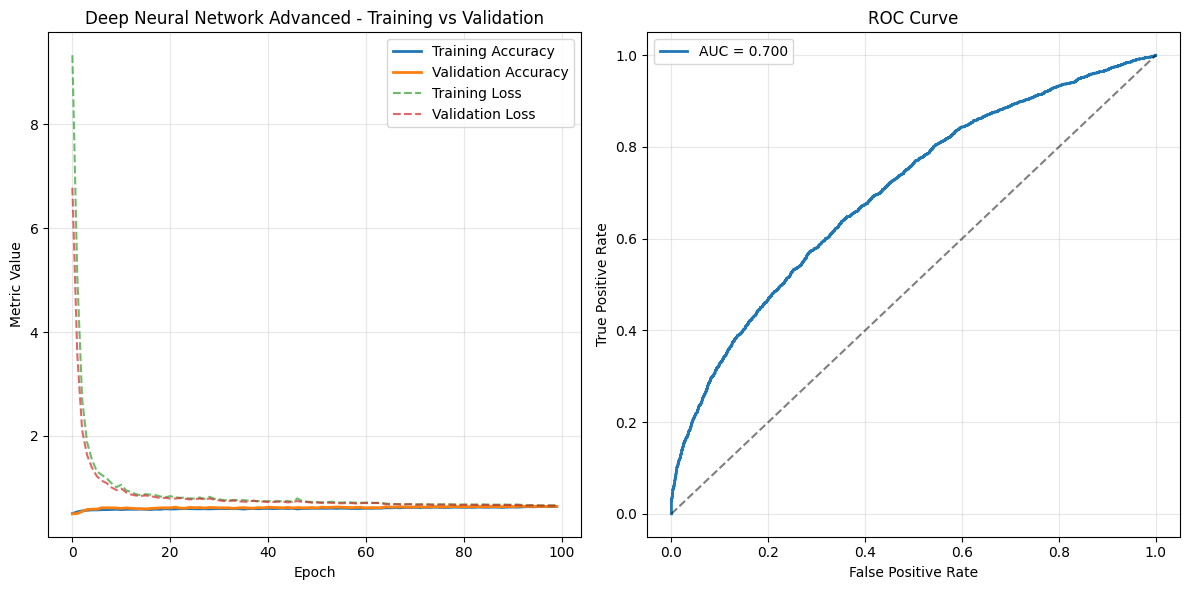

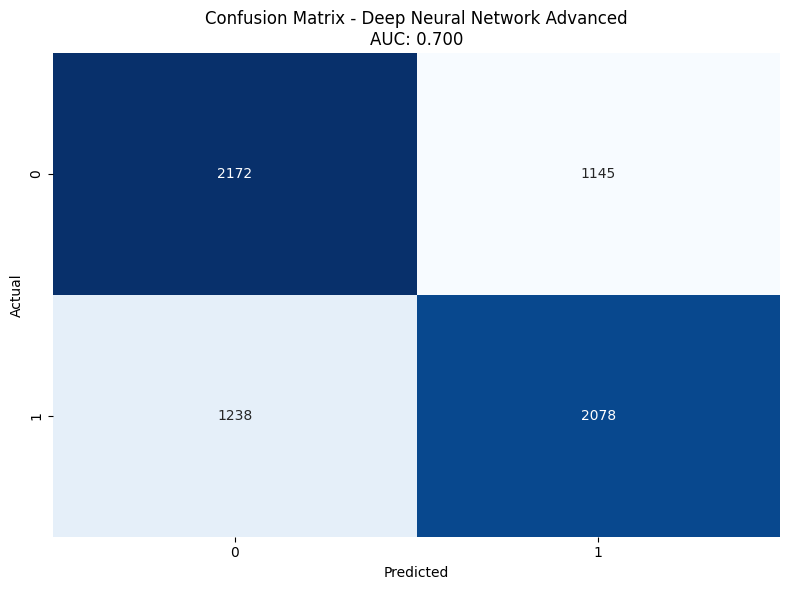

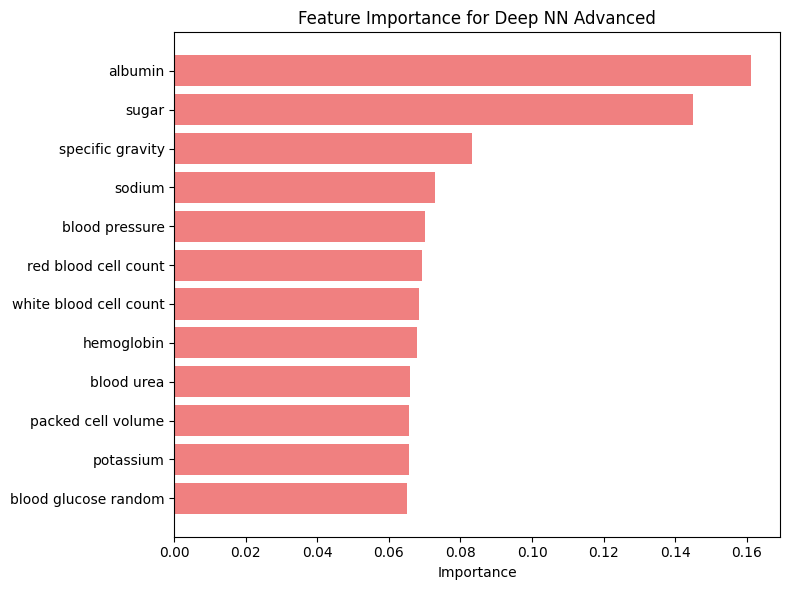


Deep Neural Network Advanced Results:
Test Accuracy: 0.641
ROC AUC: 0.700
Model Parameters: 761,922
Number of Layers: 22


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline (same as shallow)
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)
    
    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()
    
    return X_selected, y_smote, selected_features, scaler, selector

# Preprocess data
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define deep neural network architecture with more layers and complexity
def create_deep_nn_advanced(input_dim):
    """Deep neural network with more layers"""
    model = Sequential([
        Dense(1024, activation='relu', input_shape=(input_dim,), kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.6),
        
        Dense(512, activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(2, activation='softmax')
    ])
    return model

# Create and compile the deep neural network model
model = create_deep_nn_advanced(X_train.shape[1])

# Enhanced training configuration
epochs = 100  # Keep epochs at a moderate level
batch_size = 32  # Use a batch size of 32 for reasonable performance
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),  # Early stopping with patience 10
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1),
    ModelCheckpoint('best_deep_nn_advanced.h5', monitor='val_accuracy', save_best_only=True, verbose=0)
]

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test_cat),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
report = classification_report(y_test, y_pred, output_dict=True)

# Display results
print("\nDeep Neural Network Advanced - ROC AUC:", roc_auc)
print("Deep Neural Network Advanced - Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 6))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', alpha=0.7)
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', alpha=0.7)
plt.title('Deep Neural Network Advanced - Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, alpha=0.3)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Deep Neural Network Advanced\nAUC: {roc_auc:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (using RandomForest for feature importance ranking)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_processed, y_processed)
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance for Deep NN Advanced')
plt.tight_layout()
plt.show()

# Final analysis
print("\nDeep Neural Network Advanced Results:")
print("="*70)
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Model Parameters: {model.count_params():,}")
print(f"Number of Layers: {len(model.layers)}")


# use all features don't do feature reduction 

Epoch 1/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 10.9313

830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5035 - loss: 9.8061 - val_accuracy: 0.4998 - val_loss: 7.4638 - learning_rate: 5.0000e-04
Epoch 2/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5181 - loss: 5.5727 - val_accuracy: 0.4995 - val_loss: 3.8392 - learning_rate: 5.0000e-04
Epoch 3/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5393 - loss: 3.3370

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5494 - loss: 2.8603 - val_accuracy: 0.5313 - val_loss: 2.1284 - learning_rate: 5.0000e-04
Epoch 4/500
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5654 - loss: 1.9552

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5751 - loss: 1.7788 - val_accuracy: 0.5373 - val_loss: 1.5273 - learning_rate: 5.0000e-04
Epoch 5/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5832 - loss: 1.4287

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5923 - loss: 1.3597 - val_accuracy: 0.6109 - val_loss: 1.2690 - learning_rate: 5.0000e-04
Epoch 6/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5924 - loss: 1.3372

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5995 - loss: 1.2690 - val_accuracy: 0.6151 - val_loss: 1.1632 - learning_rate: 5.0000e-04
Epoch 7/500
820/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5903 - loss: 1.2264

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5996 - loss: 1.1770 - val_accuracy: 0.6323 - val_loss: 1.0879 - learning_rate: 5.0000e-04
Epoch 8/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5967 - loss: 1.1776 - val_accuracy: 0.6159 - val_loss: 1.0918 - learning_rate: 5.0000e-04
Epoch 9/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6034 - loss: 1.0820 - val_accuracy: 0.6240 - val_loss: 1.0331 - learning_rate: 5.0000e-04
Epoch 10/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6066 - loss: 1.0137 - val_accuracy: 0.6186 - val_loss: 0.9844 - learning_rate: 5.0000e-04
Epoch 11/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6180 - loss: 0.9783 - val_accuracy: 0.6303 - val_loss: 0.9486 - learning_rate: 5.0000e-04
Epoch 12/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6193 - loss: 1.0209 - val_accuracy: 0.6293 - val_loss: 0.9772 - learning_rate: 5.0000e-04
Epoch 13/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6202 - loss: 1.0279 - val_accuracy: 0.6419 - val_loss: 1.0011 - learning_rate: 5.0000e-04
Epoch 16/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6146 - loss: 1.0216
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6201 - loss: 0.9950 - val_accuracy: 0.6481 - val_loss: 0.9491 - learning_rate: 5.0000e-04
Epoch 17/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6307 - loss: 0.9493

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6457 - loss: 0.9133 - val_accuracy: 0.6618 - val_loss: 0.8690 - learning_rate: 2.5000e-04
Epoch 18/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6534 - loss: 0.8676

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6577 - loss: 0.8524 - val_accuracy: 0.6738 - val_loss: 0.8341 - learning_rate: 2.5000e-04
Epoch 19/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6633 - loss: 0.8436

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6661 - loss: 0.8312 - val_accuracy: 0.6742 - val_loss: 0.8210 - learning_rate: 2.5000e-04
Epoch 20/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6625 - loss: 0.8197

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6674 - loss: 0.8090 - val_accuracy: 0.6878 - val_loss: 0.7977 - learning_rate: 2.5000e-04
Epoch 21/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6715 - loss: 0.7908 - val_accuracy: 0.6769 - val_loss: 0.7895 - learning_rate: 2.5000e-04
Epoch 22/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6743 - loss: 0.7847 - val_accuracy: 0.6863 - val_loss: 0.7807 - learning_rate: 2.5000e-04
Epoch 23/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6794 - loss: 0.7782 - val_accuracy: 0.6829 - val_loss: 0.7822 - learning_rate: 2.5000e-04
Epoch 24/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6797 - loss: 0.7736 - val_accuracy: 0.6867 - val_loss: 0.7783 - learning_rate: 2.5000e-04
Epoch 25/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 0.7676

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6860 - loss: 0.7610 - val_accuracy: 0.6974 - val_loss: 0.7544 - learning_rate: 2.5000e-04
Epoch 26/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6835 - loss: 0.7651 - val_accuracy: 0.6941 - val_loss: 0.7601 - learning_rate: 2.5000e-04
Epoch 27/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6902 - loss: 0.7562 - val_accuracy: 0.6947 - val_loss: 0.7521 - learning_rate: 2.5000e-04
Epoch 28/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6905 - loss: 0.7473 - val_accuracy: 0.6968 - val_loss: 0.7498 - learning_rate: 2.5000e-04
Epoch 29/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6901 - loss: 0.7454 - val_accuracy: 0.6961 - val_loss: 0.7523 - learning_rate: 2.5000e-04
Epoch 30/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6851 - loss: 0.7607

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6941 - loss: 0.7479 - val_accuracy: 0.6992 - val_loss: 0.7533 - learning_rate: 2.5000e-04
Epoch 31/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6895 - loss: 0.7505

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6934 - loss: 0.7402 - val_accuracy: 0.7009 - val_loss: 0.7491 - learning_rate: 2.5000e-04
Epoch 32/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6971 - loss: 0.7457

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6981 - loss: 0.7408 - val_accuracy: 0.7022 - val_loss: 0.7486 - learning_rate: 2.5000e-04
Epoch 33/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7014 - loss: 0.7369 - val_accuracy: 0.6997 - val_loss: 0.7501 - learning_rate: 2.5000e-04
Epoch 34/500
824/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.7380

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6997 - loss: 0.7349 - val_accuracy: 0.7066 - val_loss: 0.7452 - learning_rate: 2.5000e-04
Epoch 35/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7081 - loss: 0.7279 - val_accuracy: 0.7027 - val_loss: 0.7460 - learning_rate: 2.5000e-04
Epoch 36/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7006 - loss: 0.7398

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7056 - loss: 0.7331 - val_accuracy: 0.7114 - val_loss: 0.7385 - learning_rate: 2.5000e-04
Epoch 37/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7050 - loss: 0.7336 - val_accuracy: 0.7083 - val_loss: 0.7300 - learning_rate: 2.5000e-04
Epoch 38/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.7285

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7047 - loss: 0.7250 - val_accuracy: 0.7148 - val_loss: 0.7431 - learning_rate: 2.5000e-04
Epoch 39/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7026 - loss: 0.7219 - val_accuracy: 0.7125 - val_loss: 0.7340 - learning_rate: 2.5000e-04
Epoch 40/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7060 - loss: 0.7316 - val_accuracy: 0.7019 - val_loss: 0.7410 - learning_rate: 2.5000e-04
Epoch 41/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7062 - loss: 0.7207 - val_accuracy: 0.7104 - val_loss: 0.7324 - learning_rate: 2.5000e-04
Epoch 42/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.7322
Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7065 - loss: 0.7261 - val_accuracy: 0.7048 - val_loss: 0.7462 - learning_rate: 2.5000e-04
Epoch 43/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.718

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7265 - loss: 0.6843 - val_accuracy: 0.7175 - val_loss: 0.6968 - learning_rate: 1.2500e-04
Epoch 44/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7296 - loss: 0.6661

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7341 - loss: 0.6573 - val_accuracy: 0.7208 - val_loss: 0.6811 - learning_rate: 1.2500e-04
Epoch 45/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.6463

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7401 - loss: 0.6411 - val_accuracy: 0.7244 - val_loss: 0.6746 - learning_rate: 1.2500e-04
Epoch 46/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7401 - loss: 0.6413

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7432 - loss: 0.6358 - val_accuracy: 0.7273 - val_loss: 0.6695 - learning_rate: 1.2500e-04
Epoch 47/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7378 - loss: 0.6380

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7435 - loss: 0.6303 - val_accuracy: 0.7286 - val_loss: 0.6592 - learning_rate: 1.2500e-04
Epoch 48/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.6312

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7457 - loss: 0.6254 - val_accuracy: 0.7375 - val_loss: 0.6537 - learning_rate: 1.2500e-04
Epoch 49/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7516 - loss: 0.6167 - val_accuracy: 0.7300 - val_loss: 0.6541 - learning_rate: 1.2500e-04
Epoch 50/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7547 - loss: 0.6123 - val_accuracy: 0.7356 - val_loss: 0.6471 - learning_rate: 1.2500e-04
Epoch 51/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7523 - loss: 0.6131 - val_accuracy: 0.7325 - val_loss: 0.6563 - learning_rate: 1.2500e-04
Epoch 52/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - loss: 0.6126

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7544 - loss: 0.6102 - val_accuracy: 0.7380 - val_loss: 0.6445 - learning_rate: 1.2500e-04
Epoch 53/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - loss: 0.6096

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7589 - loss: 0.6041 - val_accuracy: 0.7386 - val_loss: 0.6407 - learning_rate: 1.2500e-04
Epoch 54/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7591 - loss: 0.6018 - val_accuracy: 0.7363 - val_loss: 0.6430 - learning_rate: 1.2500e-04
Epoch 55/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7617 - loss: 0.6001

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7605 - loss: 0.5976 - val_accuracy: 0.7414 - val_loss: 0.6353 - learning_rate: 1.2500e-04
Epoch 56/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7598 - loss: 0.5956 - val_accuracy: 0.7413 - val_loss: 0.6307 - learning_rate: 1.2500e-04
Epoch 57/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7598 - loss: 0.5966

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7622 - loss: 0.5931 - val_accuracy: 0.7420 - val_loss: 0.6394 - learning_rate: 1.2500e-04
Epoch 58/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7603 - loss: 0.5949 - val_accuracy: 0.7389 - val_loss: 0.6403 - learning_rate: 1.2500e-04
Epoch 59/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7587 - loss: 0.5941

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7621 - loss: 0.5907 - val_accuracy: 0.7443 - val_loss: 0.6414 - learning_rate: 1.2500e-04
Epoch 60/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7617 - loss: 0.5908 - val_accuracy: 0.7439 - val_loss: 0.6310 - learning_rate: 1.2500e-04
Epoch 61/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.5885

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7648 - loss: 0.5881 - val_accuracy: 0.7476 - val_loss: 0.6218 - learning_rate: 1.2500e-04
Epoch 62/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7663 - loss: 0.5830 - val_accuracy: 0.7410 - val_loss: 0.6416 - learning_rate: 1.2500e-04
Epoch 63/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7682 - loss: 0.5814 - val_accuracy: 0.7413 - val_loss: 0.6394 - learning_rate: 1.2500e-04
Epoch 64/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7671 - loss: 0.5868

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7671 - loss: 0.5840 - val_accuracy: 0.7505 - val_loss: 0.6214 - learning_rate: 1.2500e-04
Epoch 65/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7669 - loss: 0.5847 - val_accuracy: 0.7479 - val_loss: 0.6250 - learning_rate: 1.2500e-04
Epoch 66/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7672 - loss: 0.5801 - val_accuracy: 0.7485 - val_loss: 0.6222 - learning_rate: 1.2500e-04
Epoch 67/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7694 - loss: 0.5787 - val_accuracy: 0.7500 - val_loss: 0.6252 - learning_rate: 1.2500e-04
Epoch 68/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7694 - loss: 0.5757 - val_accuracy: 0.7451 - val_loss: 0.6298 - learning_rate: 1.2500e-04
Epoch 69/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7701 - loss: 0.5785
Epoch 69: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.


830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7713 - loss: 0.5748 - val_accuracy: 0.7526 - val_loss: 0.6305 - learning_rate: 1.2500e-04
Epoch 70/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7794 - loss: 0.5627

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7872 - loss: 0.5499 - val_accuracy: 0.7582 - val_loss: 0.6081 - learning_rate: 6.2500e-05
Epoch 71/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.5420

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7890 - loss: 0.5358 - val_accuracy: 0.7612 - val_loss: 0.5985 - learning_rate: 6.2500e-05
Epoch 72/500
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7883 - loss: 0.5348

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7906 - loss: 0.5276 - val_accuracy: 0.7660 - val_loss: 0.5878 - learning_rate: 6.2500e-05
Epoch 73/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7957 - loss: 0.5226 - val_accuracy: 0.7595 - val_loss: 0.5820 - learning_rate: 6.2500e-05
Epoch 74/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5180

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7987 - loss: 0.5153 - val_accuracy: 0.7689 - val_loss: 0.5754 - learning_rate: 6.2500e-05
Epoch 75/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7967 - loss: 0.5187 - val_accuracy: 0.7660 - val_loss: 0.5798 - learning_rate: 6.2500e-05
Epoch 76/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7983 - loss: 0.5083 - val_accuracy: 0.7678 - val_loss: 0.5771 - learning_rate: 6.2500e-05
Epoch 77/500
824/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.5068

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8059 - loss: 0.5059 - val_accuracy: 0.7733 - val_loss: 0.5691 - learning_rate: 6.2500e-05
Epoch 78/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8028 - loss: 0.5049 - val_accuracy: 0.7681 - val_loss: 0.5698 - learning_rate: 6.2500e-05
Epoch 79/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8030 - loss: 0.4992 - val_accuracy: 0.7713 - val_loss: 0.5699 - learning_rate: 6.2500e-05
Epoch 80/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8058 - loss: 0.5006 - val_accuracy: 0.7690 - val_loss: 0.5720 - learning_rate: 6.2500e-05
Epoch 81/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8071 - loss: 0.4998 - val_accuracy: 0.7684 - val_loss: 0.5595 - learning_rate: 6.2500e-05
Epoch 82/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8085 - loss: 0.4955

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8087 - loss: 0.4950 - val_accuracy: 0.7736 - val_loss: 0.5589 - learning_rate: 6.2500e-05
Epoch 83/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8056 - loss: 0.4959 - val_accuracy: 0.7731 - val_loss: 0.5551 - learning_rate: 6.2500e-05
Epoch 84/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8078 - loss: 0.4923

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8104 - loss: 0.4913 - val_accuracy: 0.7764 - val_loss: 0.5526 - learning_rate: 6.2500e-05
Epoch 85/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8097 - loss: 0.4897 - val_accuracy: 0.7724 - val_loss: 0.5603 - learning_rate: 6.2500e-05
Epoch 86/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8136 - loss: 0.4855

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8128 - loss: 0.4860 - val_accuracy: 0.7779 - val_loss: 0.5538 - learning_rate: 6.2500e-05
Epoch 87/500
820/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8119 - loss: 0.4923

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8130 - loss: 0.4881 - val_accuracy: 0.7781 - val_loss: 0.5648 - learning_rate: 6.2500e-05
Epoch 88/500
812/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.4865

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8183 - loss: 0.4818 - val_accuracy: 0.7799 - val_loss: 0.5474 - learning_rate: 6.2500e-05
Epoch 89/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8137 - loss: 0.4871 - val_accuracy: 0.7761 - val_loss: 0.5523 - learning_rate: 6.2500e-05
Epoch 90/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8127 - loss: 0.4861 - val_accuracy: 0.7764 - val_loss: 0.5534 - learning_rate: 6.2500e-05
Epoch 91/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8146 - loss: 0.4843

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8158 - loss: 0.4816 - val_accuracy: 0.7808 - val_loss: 0.5506 - learning_rate: 6.2500e-05
Epoch 92/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8170 - loss: 0.4780 - val_accuracy: 0.7764 - val_loss: 0.5612 - learning_rate: 6.2500e-05
Epoch 93/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8156 - loss: 0.4828
Epoch 93: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.


830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8169 - loss: 0.4809 - val_accuracy: 0.7814 - val_loss: 0.5512 - learning_rate: 6.2500e-05
Epoch 94/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.4733

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8240 - loss: 0.4667 - val_accuracy: 0.7858 - val_loss: 0.5366 - learning_rate: 3.1250e-05
Epoch 95/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8299 - loss: 0.4561 - val_accuracy: 0.7855 - val_loss: 0.5401 - learning_rate: 3.1250e-05
Epoch 96/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8278 - loss: 0.4541 - val_accuracy: 0.7821 - val_loss: 0.5421 - learning_rate: 3.1250e-05
Epoch 97/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8354 - loss: 0.4452 - val_accuracy: 0.7855 - val_loss: 0.5325 - learning_rate: 3.1250e-05
Epoch 98/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8295 - loss: 0.4479

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8335 - loss: 0.4408 - val_accuracy: 0.7924 - val_loss: 0.5441 - learning_rate: 3.1250e-05
Epoch 99/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8332 - loss: 0.4409 - val_accuracy: 0.7891 - val_loss: 0.5320 - learning_rate: 3.1250e-05
Epoch 100/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8362 - loss: 0.4402 - val_accuracy: 0.7906 - val_loss: 0.5215 - learning_rate: 3.1250e-05
Epoch 101/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8363 - loss: 0.4367 - val_accuracy: 0.7918 - val_loss: 0.5163 - learning_rate: 3.1250e-05
Epoch 102/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.4405

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8363 - loss: 0.4400 - val_accuracy: 0.7938 - val_loss: 0.5170 - learning_rate: 3.1250e-05
Epoch 103/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8390 - loss: 0.4375

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8387 - loss: 0.4346 - val_accuracy: 0.7941 - val_loss: 0.5154 - learning_rate: 3.1250e-05
Epoch 104/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8420 - loss: 0.4289

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8389 - loss: 0.4321 - val_accuracy: 0.7956 - val_loss: 0.5156 - learning_rate: 3.1250e-05
Epoch 105/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8412 - loss: 0.4283 - val_accuracy: 0.7936 - val_loss: 0.5093 - learning_rate: 3.1250e-05
Epoch 106/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.4338

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8385 - loss: 0.4323 - val_accuracy: 0.7980 - val_loss: 0.5146 - learning_rate: 3.1250e-05
Epoch 107/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.4369

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8414 - loss: 0.4306 - val_accuracy: 0.7995 - val_loss: 0.5001 - learning_rate: 3.1250e-05
Epoch 108/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8416 - loss: 0.4261 - val_accuracy: 0.7995 - val_loss: 0.5067 - learning_rate: 3.1250e-05
Epoch 109/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8445 - loss: 0.4198 - val_accuracy: 0.7962 - val_loss: 0.5076 - learning_rate: 3.1250e-05
Epoch 110/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8384 - loss: 0.4333

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8408 - loss: 0.4257 - val_accuracy: 0.8002 - val_loss: 0.4956 - learning_rate: 3.1250e-05
Epoch 111/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8426 - loss: 0.4218 - val_accuracy: 0.7956 - val_loss: 0.4972 - learning_rate: 3.1250e-05
Epoch 112/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8452 - loss: 0.4221

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8449 - loss: 0.4204 - val_accuracy: 0.8011 - val_loss: 0.4909 - learning_rate: 3.1250e-05
Epoch 113/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8470 - loss: 0.4177 - val_accuracy: 0.8004 - val_loss: 0.4943 - learning_rate: 3.1250e-05
Epoch 114/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8445 - loss: 0.4208

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8448 - loss: 0.4208 - val_accuracy: 0.8066 - val_loss: 0.4883 - learning_rate: 3.1250e-05
Epoch 115/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8469 - loss: 0.4201 - val_accuracy: 0.8021 - val_loss: 0.4933 - learning_rate: 3.1250e-05
Epoch 116/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8462 - loss: 0.4172 - val_accuracy: 0.8014 - val_loss: 0.4933 - learning_rate: 3.1250e-05
Epoch 117/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8467 - loss: 0.4152 - val_accuracy: 0.8046 - val_loss: 0.4912 - learning_rate: 3.1250e-05
Epoch 118/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8463 - loss: 0.4154 - val_accuracy: 0.8052 - val_loss: 0.4919 - learning_rate: 3.1250e-05
Epoch 119/500
820/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8446 - loss: 0.4165

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8478 - loss: 0.4137 - val_accuracy: 0.8075 - val_loss: 0.4871 - learning_rate: 3.1250e-05
Epoch 120/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8492 - loss: 0.4127 - val_accuracy: 0.8040 - val_loss: 0.4902 - learning_rate: 3.1250e-05
Epoch 121/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8475 - loss: 0.4107 - val_accuracy: 0.8028 - val_loss: 0.4879 - learning_rate: 3.1250e-05
Epoch 122/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8511 - loss: 0.4109 - val_accuracy: 0.8049 - val_loss: 0.4857 - learning_rate: 3.1250e-05
Epoch 123/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8487 - loss: 0.4108 - val_accuracy: 0.8019 - val_loss: 0.4866 - learning_rate: 3.1250e-05
Epoch 124/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8482 - loss: 0.4105 - val_accuracy: 0.8037 - val_loss: 0.4849 - learning_rate: 3.1250e-05
Epoch 125/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8526 - loss: 0.4032 - val_accuracy: 0.8093 - val_loss: 0.4762 - learning_rate: 3.1250e-05
Epoch 133/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8531 - loss: 0.4058 - val_accuracy: 0.8091 - val_loss: 0.4816 - learning_rate: 3.1250e-05
Epoch 134/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8565 - loss: 0.3990 - val_accuracy: 0.8058 - val_loss: 0.4786 - learning_rate: 3.1250e-05
Epoch 135/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8576 - loss: 0.3967 - val_accuracy: 0.8078 - val_loss: 0.4832 - learning_rate: 3.1250e-05
Epoch 136/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8571 - loss: 0.3978 - val_accuracy: 0.8087 - val_loss: 0.4796 - learning_rate: 3.1250e-05
Epoch 137/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8596 - loss: 0.3962
Epoch 137: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8616 - loss: 0.3883 - val_accuracy: 0.8094 - val_loss: 0.4825 - learning_rate: 1.5625e-05
Epoch 139/500
824/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8608 - loss: 0.3895

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8640 - loss: 0.3834 - val_accuracy: 0.8120 - val_loss: 0.4796 - learning_rate: 1.5625e-05
Epoch 140/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8677 - loss: 0.3809

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8666 - loss: 0.3806 - val_accuracy: 0.8152 - val_loss: 0.4789 - learning_rate: 1.5625e-05
Epoch 141/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8671 - loss: 0.3800 - val_accuracy: 0.8123 - val_loss: 0.4763 - learning_rate: 1.5625e-05
Epoch 142/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8640 - loss: 0.3794
Epoch 142: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8658 - loss: 0.3764 - val_accuracy: 0.8111 - val_loss: 0.4794 - learning_rate: 1.5625e-05
Epoch 142: early stopping
Restoring model weights from the end of the best epoch: 132.
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Deep Neural Network Advanced - ROC AUC: 0.8898259796282848
Deep Neural Network Advanced - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      3317
           1       0.81      0.8

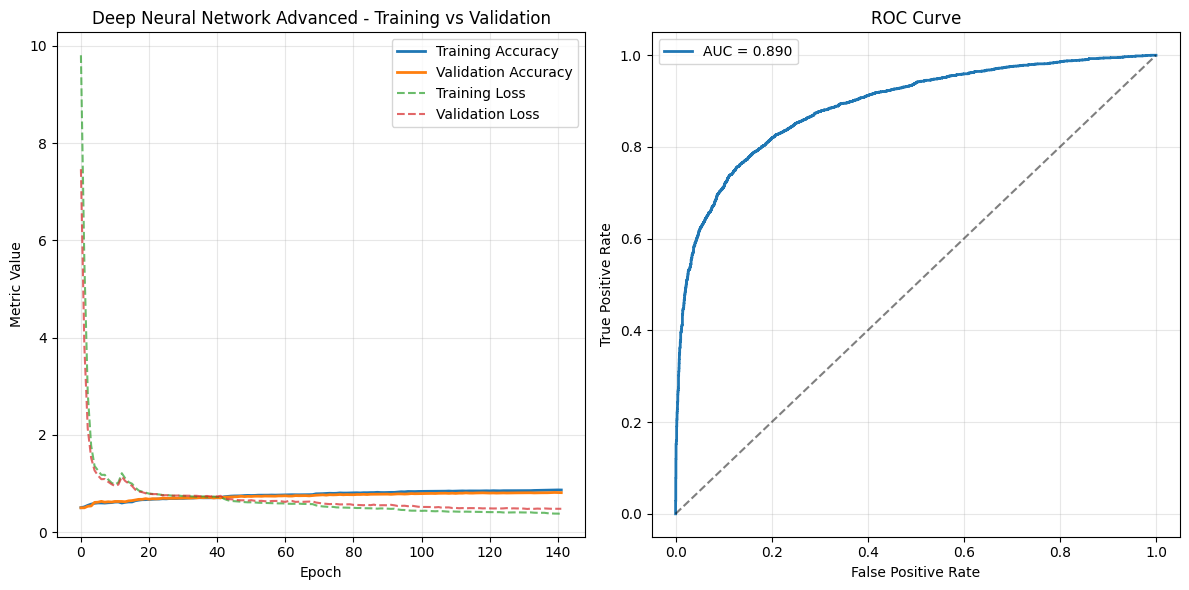

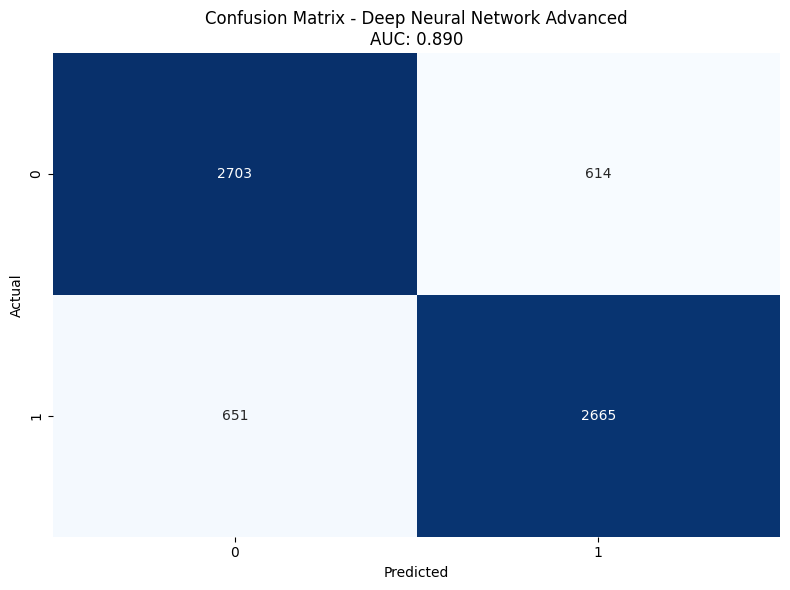


Deep Neural Network Advanced Results:
Test Accuracy: 0.809
ROC AUC: 0.890
Model Parameters: 774,210
Number of Layers: 22


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline (no feature selection)
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)
    
    return X_smote, y_smote, scaler

# Preprocess data
X_processed, y_processed, scaler = preprocess_data(df)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define deep neural network architecture with more layers and complexity
def create_deep_nn_advanced(input_dim):
    """Deep neural network with more layers"""
    model = Sequential([
        Dense(1024, activation='relu', input_shape=(input_dim,), kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.6),
        
        Dense(512, activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(2, activation='softmax')
    ])
    return model

# Create and compile the deep neural network model
model = create_deep_nn_advanced(X_train.shape[1])

# Enhanced training configuration
epochs = 500  # Keep epochs at a moderate level
batch_size = 32  # Use a batch size of 32 for reasonable performance
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),  # Early stopping with patience 10
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1),
    ModelCheckpoint('best_deep_nn_advanced.h5', monitor='val_accuracy', save_best_only=True, verbose=0)
]

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test_cat),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
report = classification_report(y_test, y_pred, output_dict=True)

# Display results
print("\nDeep Neural Network Advanced - ROC AUC:", roc_auc)
print("Deep Neural Network Advanced - Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 6))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', alpha=0.7)
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', alpha=0.7)
plt.title('Deep Neural Network Advanced - Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, alpha=0.3)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Deep Neural Network Advanced\nAUC: {roc_auc:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Final analysis
print("\nDeep Neural Network Advanced Results:")
print("="*70)
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Model Parameters: {model.count_params():,}")
print(f"Number of Layers: {len(model.layers)}")
